# Notebook Structure

1. Problem Statement and Data Description
2. Loading Datasets and Libraries
3. Understanding and Validating the Data
4. Data Exploration - Train, Product, Store 

## **Problem Statement:** 
Prevent overstocking and understocking of Items by forecasting demand of items for the next week, based on historical data.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import random

sns.set_context('notebook',font_scale=1.5)

import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

In [ ]:
# reading the data files
train = pd.read_csv('/content/gdrive/MyDrive/Retail_demand_forecasting/train.csv')
product_data = pd.read_csv('/content/gdrive/MyDrive/Retail_demand_forecasting/product_data.csv')
store_data = pd.read_csv('/content/gdrive/MyDrive/Retail_demand_forecasting/store_data.csv')

#### Data exploration

In [ ]:
print("Train data")
train.head()

Train data


WEEK_END_DATE  STORE_NUM         UPC  ...  FEATURE  DISPLAY  UNITS
0     14-Jan-09        367  1111009477  ...        0        0     13
1     14-Jan-09        367  1111009497  ...        0        0     20
2     14-Jan-09        367  1111085319  ...        0        0     14
3     14-Jan-09        367  1111085345  ...        0        0     29
4     14-Jan-09        367  1111085350  ...        0        0     35

[5 rows x 8 columns]

In [ ]:
print("Product data")
product_data.head()

Product data


UPC               DESCRIPTION  ...              SUB_CATEGORY PRODUCT_SIZE
0  1111009477    PL MINI TWIST PRETZELS  ...                  PRETZELS        15 OZ
1  1111009497         PL PRETZEL STICKS  ...                  PRETZELS        15 OZ
2  1111009507         PL TWIST PRETZELS  ...                  PRETZELS        15 OZ
3  1111038078  PL BL MINT ANTSPTC RINSE  ...  MOUTHWASHES (ANTISEPTIC)       500 ML
4  1111038080  PL ANTSPTC SPG MNT MTHWS  ...  MOUTHWASHES (ANTISEPTIC)       500 ML

[5 rows x 6 columns]

In [ ]:
print("Store data")
store_data.head()

Store data


STORE_ID          STORE_NAME  ... SALES_AREA_SIZE_NUM AVG_WEEKLY_BASKETS
0       367      15TH & MADISON  ...               24721              12707
1       389          SILVERLAKE  ...               46073              24767
2       613          EAST ALLEN  ...               64926              29386
3       623             HOUSTON  ...               46930              36741
4      2277  ANDERSON TOWNE CTR  ...               81958              54053

[5 rows x 9 columns]

In [ ]:
print("Shape of train data", train.shape)
print("Shape of product data", product_data.shape)
print("Shape of store data", store_data.shape) 

Shape of train data (232287, 8)
Shape of product data (30, 6)
Shape of store data (76, 9)


## Exploratory Data Analysis

#### What we want to check

#### Date time feature

* The data is captured for what duration
* What are the start and end dates?
* Is there any missing datapoints?

#### Numerical Features

* Chaeck the distribution of numerical variables
* Are there any extreme values?
* Are there any missing values in the variable?

#### Categorical variables

* Check the unique values for categorical variables
* are there any missing values in the varibales/
* is there any variable with high cardinality

#### Train Data

---
### `DATASET 1: Weekly Sales Data` contains the following features

- **WEEK_END_DATE** - week date
- **STORE_NUM** - store number
- **UPC** - (Universal Product Code) product specific identifier
- **BASE_PRICE** - base price of item
- **DISPLAY** - product was a part of in-store promotional display
- **FEATURE** - product was in in-store circular
- **UNITS** - units sold (target)

---

In [ ]:
train.columns

Index(['WEEK_END_DATE', 'STORE_NUM', 'UPC', 'PRICE', 'BASE_PRICE', 'FEATURE',
       'DISPLAY', 'UNITS'],
      dtype='object')

In [ ]:
train.describe()

STORE_NUM           UPC  ...        DISPLAY          UNITS
count  232287.000000  2.322870e+05  ...  232287.000000  232287.000000
mean    14676.437463  3.633352e+09  ...       0.135001      28.063525
std      8841.382984  4.840891e+09  ...       0.341725      35.954341
min       367.000000  1.111009e+09  ...       0.000000       0.000000
25%      6187.000000  1.111085e+09  ...       0.000000       9.000000
50%     15541.000000  1.600028e+09  ...       0.000000      18.000000
75%     23067.000000  3.800039e+09  ...       0.000000      34.000000
max     29159.000000  3.125474e+10  ...       1.000000    1800.000000

[8 rows x 7 columns]

In [ ]:
train.dtypes

WEEK_END_DATE     object
STORE_NUM          int64
UPC                int64
PRICE            float64
BASE_PRICE       float64
FEATURE            int64
DISPLAY            int64
UNITS              int64
dtype: object

In [ ]:
train.nunique()

WEEK_END_DATE    142
STORE_NUM         76
UPC               30
PRICE            663
BASE_PRICE       620
FEATURE            2
DISPLAY            2
UNITS            545
dtype: int64

In [ ]:
train.isnull().sum()

WEEK_END_DATE     0
STORE_NUM         0
UPC               0
PRICE             3
BASE_PRICE       12
FEATURE           0
DISPLAY           0
UNITS             0
dtype: int64

#### Observation:

* train data has 8 features
* train data has all three types of features datetime, numerical and categorical that we ned to check again and we will chnage datatype accordingly 
* train data has 232287 rows and each features have unique values
* target variable is units which contain some outliers
* we have base_price feature with 12 missing values that we will impute before model building

#### Change datatypes for EDA

In [ ]:
# convert column names into lowercase
train= train.rename(columns=str.lower)

In [ ]:
train.week_end_date = pd.to_datetime(train.week_end_date)

#### Univariate analysis for Train data

#### units

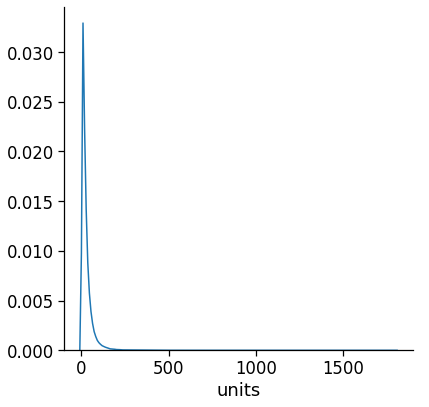

In [ ]:
#pdf of units
sns.FacetGrid(train,size=6) \
      .map(sns.kdeplot,"units") \
      .add_legend();
plt.show();

#### Observation:

* units has very right swe distribution and it simply indicates that units has outlier that we can get rid of by applying log 


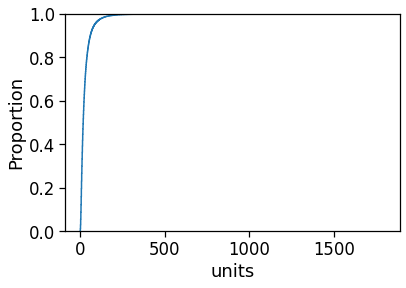

In [ ]:
sns.ecdfplot(data=train, x='units')

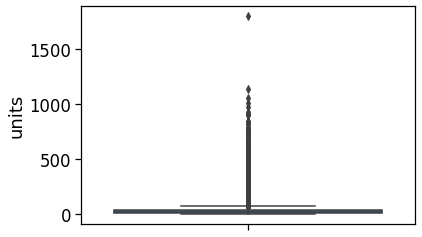

In [ ]:
sns.boxplot(y='units', data=train)
plt.show()

#### Observation:

* we can see one extreme outlier that we need to remove it 

#### Removing outlier

In [ ]:
#calculating speed values at each percntile 0,10,20,30,40,50,60,70,80,90,100 
for i in range(0,100,10):
    var = train["units"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

0 percentile value is 0
10 percentile value is 5
20 percentile value is 8
30 percentile value is 11
40 percentile value is 14
50 percentile value is 18
60 percentile value is 23
70 percentile value is 29
80 percentile value is 40
90 percentile value is 60
100 percentile value is  1800


In [ ]:
#calculating speed values at each percntile 90,91,92,93,94,95,96,97,98,99,100
for i in range(90,100):
    var = train["units"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

90 percentile value is 60
91 percentile value is 63
92 percentile value is 67
93 percentile value is 72
94 percentile value is 78
95 percentile value is 85
96 percentile value is 94
97 percentile value is 107
98 percentile value is 127
99 percentile value is 167
100 percentile value is  1800


In [ ]:
#calculating speed values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
for i in np.arange(0.0, 1.0, 0.1):
    var = train["units"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 167
99.1 percentile value is 175
99.2 percentile value is 182
99.3 percentile value is 191
99.4 percentile value is 203
99.5 percentile value is 216
99.6 percentile value is 234
99.7 percentile value is 261
99.8 percentile value is 300
99.9 percentile value is 381
100 percentile value is  1800


In [ ]:
#removing further outliers based on the 99.9th percentile value
train=train[(train.units>0) & (train.units<382)]

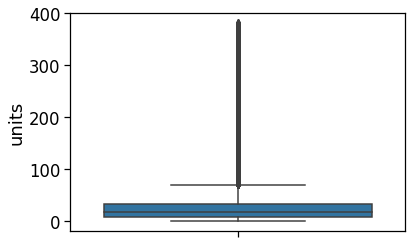

In [ ]:
# box-plot for units after removing outliers
sns.boxplot(y="units", data=train)
plt.show()

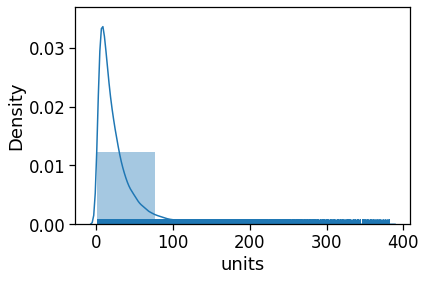

In [ ]:
sns.distplot(train['units'], rug=True, kde=True, bins=5)

#### Observation:

* We jave removed the outlier
* majority units sales in between o to 90 while very few unit sold above 1oo

#### Price

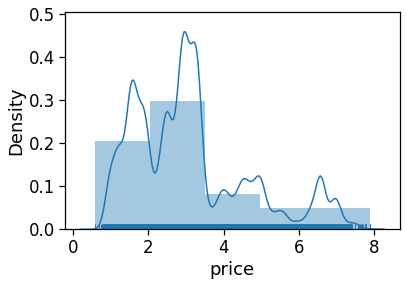

In [ ]:
sns.distplot(train['price'], rug=True, kde=True, bins=5)

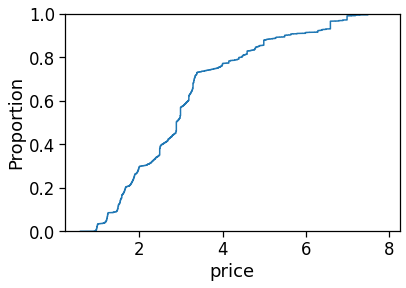

In [ ]:
sns.ecdfplot(data=train, x='price')

#### Observation:

* Product price lies between 1 to 8 and majority products has price between 2 to 4
* 70% percent product has less than 3.5 price value
* 30 % percent product has greater than 3.5 and less than 8 price values
* we have two features for product price and both have almoast similar values

#### Display - product was a part of in-store promotional display
#### Feature - product was in in-store circular

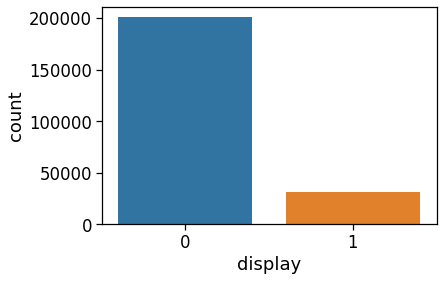

In [ ]:
sns.countplot(x='display', data=train)

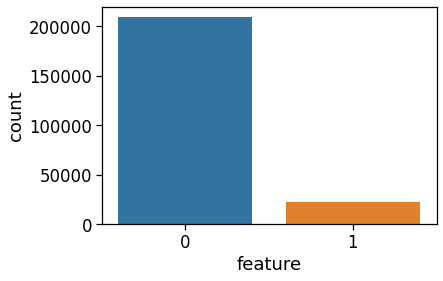

In [ ]:
sns.countplot(x='feature', data=train)

#### Observation:

* we have around 25000 products on display which is a part of store promotional display
* we have around 24000 products in store circulation

#### Store number
#### UPC

In [ ]:
train['store_num'].value_counts()

2513     4095
24991    3962
21237    3945
9825     3937
11993    3814
         ... 
15755    2253
11967    2104
2523     1977
23055    1823
8035     1676
Name: store_num, Length: 76, dtype: int64

In [ ]:
train['upc'].value_counts()

1111085345     10789
1600027564     10775
1111085350     10775
1600027528     10774
7192100339     10767
3800031838     10757
3800039118     10732
1600027527     10661
3800031829     10639
1111085319     10636
7192100337     10588
1111009497     10497
1111009477     10344
1111087398      9989
7192100336      9126
2840004768      8488
1111087395      8155
1111087396      8131
1111009507      8067
2840004770      7636
1111038078      7131
7797502248      6916
7218063052      3641
31254742735     3201
7797508006      2933
1111038080      2797
7797508004      2386
31254742835     2086
3700031613      1664
3700044982       975
Name: upc, dtype: int64

In [ ]:
train['upc'].unique()

array([ 1111009477,  1111009497,  1111085319,  1111085345,  1111085350,
        1111087395,  1111087396,  1111087398,  1600027527,  1600027528,
        1600027564,  3800031829,  3800031838,  3800039118,  7192100337,
        7192100339,  1111009507,  1111038078,  1111038080,  2840004768,
        2840004770,  7192100336,  7797502248,  7797508006, 31254742835,
        7218063052,  7797508004,  3700044982,  3700031613, 31254742735])

#### Observation:

* we have 76 unique store numbers and 30 unique upc code 

#### Weekend date

In [ ]:
train['week_end_date'] = pd.to_datetime(train['week_end_date'])

In [ ]:
train['week_end_date'].isnull().sum()

0

In [ ]:
train['week_end_date'].min(), train['week_end_date'].max()

(Timestamp('2009-01-14 00:00:00'), Timestamp('2011-09-28 00:00:00'))

In [ ]:
(train['week_end_date'].max() - train['week_end_date'].min()) / 7

Timedelta('141 days 00:00:00')

In [ ]:
train['week_end_date'].nunique()

142

In [ ]:
train['week_end_date'].dt.day_name().value_counts()

Wednesday    232056
Name: week_end_date, dtype: int64

#### Observation:

* we do not have any missing date in week_end_date feature
* weekend date start from 2009-01-14 to end with 2011-09-28
* we have data from 2009 to 2011

#### Missing value imputation for base price featutre

In [ ]:
# create a new dataframe which will have "average base price" for the combination of STORE_NUM and UPC
# we will use this to impute the missing values 
avg_price = train.groupby(['store_num', 'upc'])['base_price'].mean().reset_index()

In [ ]:
# null values in BASE PRICE
train.loc[train.base_price.isna() == True]

week_end_date  store_num         upc  ...  feature  display  units
279     2009-01-14       4245  1111087395  ...        0        1     56
280     2009-01-14       4245  1111087398  ...        0        1     72
301     2009-01-14       4259  1111087395  ...        0        1     52
303     2009-01-14       4259  1111087398  ...        0        1     52
1918    2009-01-21       4245  1111087395  ...        0        1     52
1919    2009-01-21       4245  1111087398  ...        0        1     82
1940    2009-01-21       4259  1111087395  ...        0        1     28
3555    2009-01-28       4245  1111087395  ...        1        1     45
3556    2009-01-28       4245  1111087398  ...        1        1     34
3577    2009-01-28       4259  1111087395  ...        1        1     31
5191    2009-02-04       4245  1111087395  ...        0        1     54
5192    2009-02-04       4245  1111087398  ...        0        1     66

[12 rows x 8 columns]

In [ ]:
# define function to fill missing base price values
def fill_base_price(x) :
    return avg_price.base_price[(avg_price.store_num == x['store_num']) & (avg_price.upc == x['upc'])].values[0]

train.base_price[train.base_price.isna() == True] = train[train.base_price.isna() == True].apply(fill_base_price, axis=1)

In [ ]:
# checking missing values
train.isnull().sum()

week_end_date    0
store_num        0
upc              0
price            2
base_price       0
feature          0
display          0
units            0
dtype: int64

In [ ]:
# here we are dropping price feature since price and base price features have simlilar values and no point to keep multicollinear features
train = train.drop('price', axis=1)

#### Univariate analysis for Product data

---

### `DATASET 2: PRODUCT DATA` contains the details about the products

- **UPC** - (Universal Product Code) product specific identifier
- **DESCRIPTION**	- product description
- **MANUFACTURER** - product	manufacturer
- **CATEGORY** - category of product
- **SUB_CATEGORY** - sub-category of product
- **PRODUCT_SIZE** - package size or quantity of product

---

In [ ]:
product_data.head()

UPC               DESCRIPTION  ...              SUB_CATEGORY PRODUCT_SIZE
0  1111009477    PL MINI TWIST PRETZELS  ...                  PRETZELS        15 OZ
1  1111009497         PL PRETZEL STICKS  ...                  PRETZELS        15 OZ
2  1111009507         PL TWIST PRETZELS  ...                  PRETZELS        15 OZ
3  1111038078  PL BL MINT ANTSPTC RINSE  ...  MOUTHWASHES (ANTISEPTIC)       500 ML
4  1111038080  PL ANTSPTC SPG MNT MTHWS  ...  MOUTHWASHES (ANTISEPTIC)       500 ML

[5 rows x 6 columns]

In [ ]:
product_data.dtypes

UPC              int64
DESCRIPTION     object
MANUFACTURER    object
CATEGORY        object
SUB_CATEGORY    object
PRODUCT_SIZE    object
dtype: object

In [ ]:
product_data.nunique()

UPC             30
DESCRIPTION     29
MANUFACTURER     9
CATEGORY         4
SUB_CATEGORY     7
PRODUCT_SIZE    16
dtype: int64

In [ ]:
product_data.isnull().sum()

UPC             0
DESCRIPTION     0
MANUFACTURER    0
CATEGORY        0
SUB_CATEGORY    0
PRODUCT_SIZE    0
dtype: int64

In [ ]:
product_data.shape

(30, 6)

In [ ]:
# convert column names into lowercase
product_data= product_data.rename(columns=str.lower)

#### Obvservation:

* product data has 30 rows and 6 features
* Out of 6 features 5 are categorical and one is integer
* product data no null values
* Since product data contains categorical features, it has different unique values

#### Category

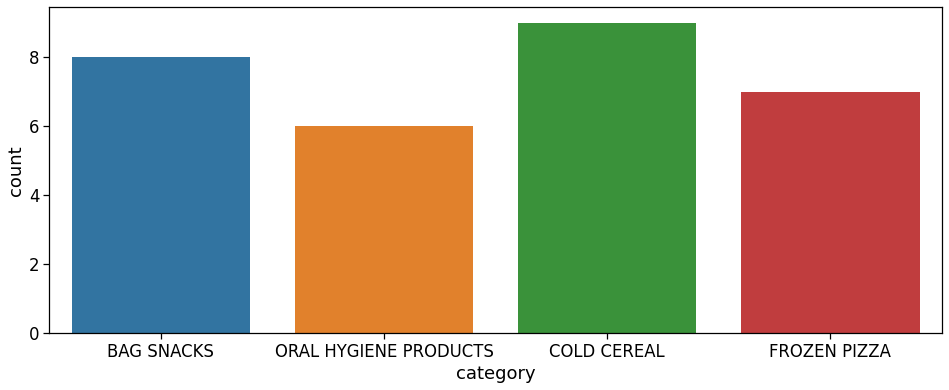

In [ ]:
plt.figure(figsize=(16, 6))
sns.countplot(x='category', data=product_data)

In [ ]:
product_data['category'].value_counts()

COLD CEREAL              9
BAG SNACKS               8
FROZEN PIZZA             7
ORAL HYGIENE PRODUCTS    6
Name: category, dtype: int64

#### Observation:

* we have four major category
* all four category has almoast equal distribution 

#### Subcategory

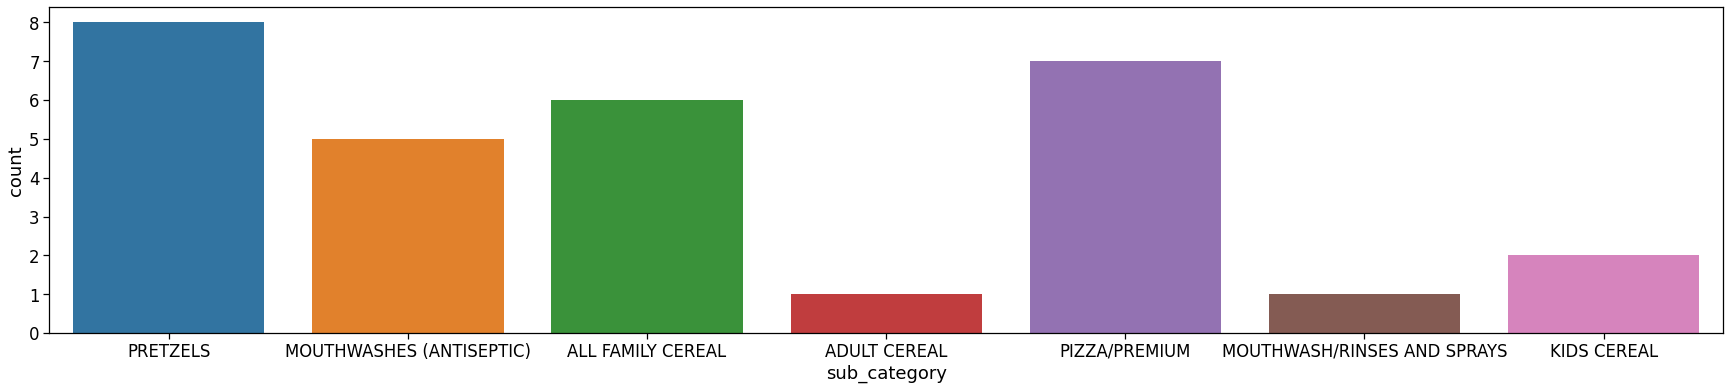

In [ ]:
plt.figure(figsize=(30, 6))
sns.countplot(x='sub_category', data=product_data)

In [ ]:
product_data['sub_category'].value_counts()

PRETZELS                       8
PIZZA/PREMIUM                  7
ALL FAMILY CEREAL              6
MOUTHWASHES (ANTISEPTIC)       5
KIDS CEREAL                    2
ADULT CEREAL                   1
MOUTHWASH/RINSES AND SPRAYS    1
Name: sub_category, dtype: int64

#### Observation:

* We have 7 sub category
* majority are pretzels, pizza, all family and mouthwash that we can further investigate in bivariate analysis

#### manufacturer

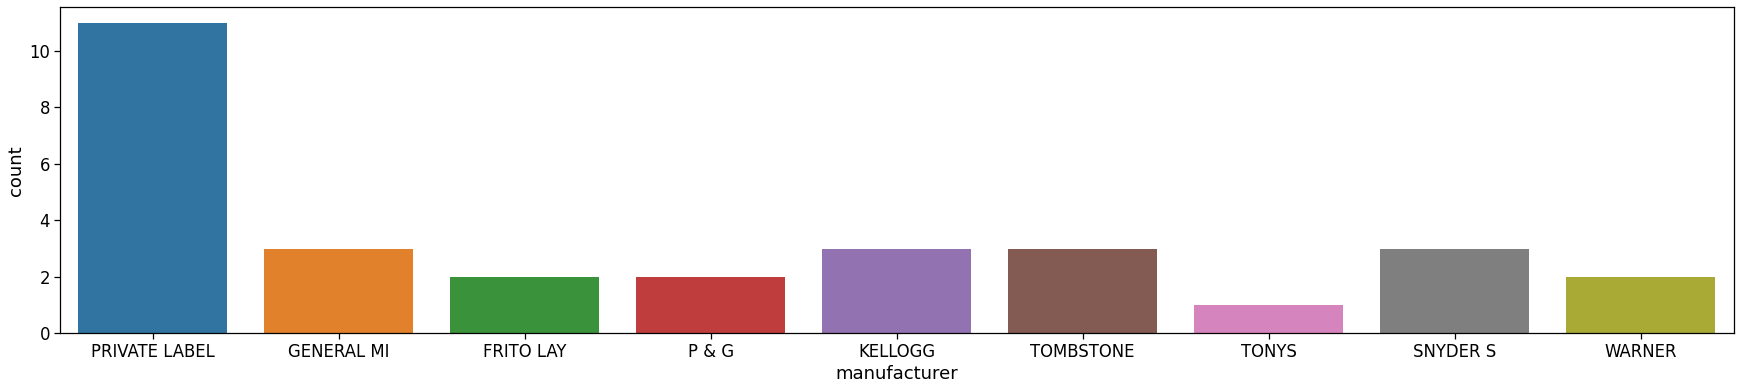

In [ ]:
plt.figure(figsize=(30, 6))
sns.countplot(x='manufacturer', data=product_data)

#### Obsrvation:

* We have in total 9 manufacturer and out of them majority products contain private label while general, kellogg, tombstone, syders has good range of products in the stores

#### Product size


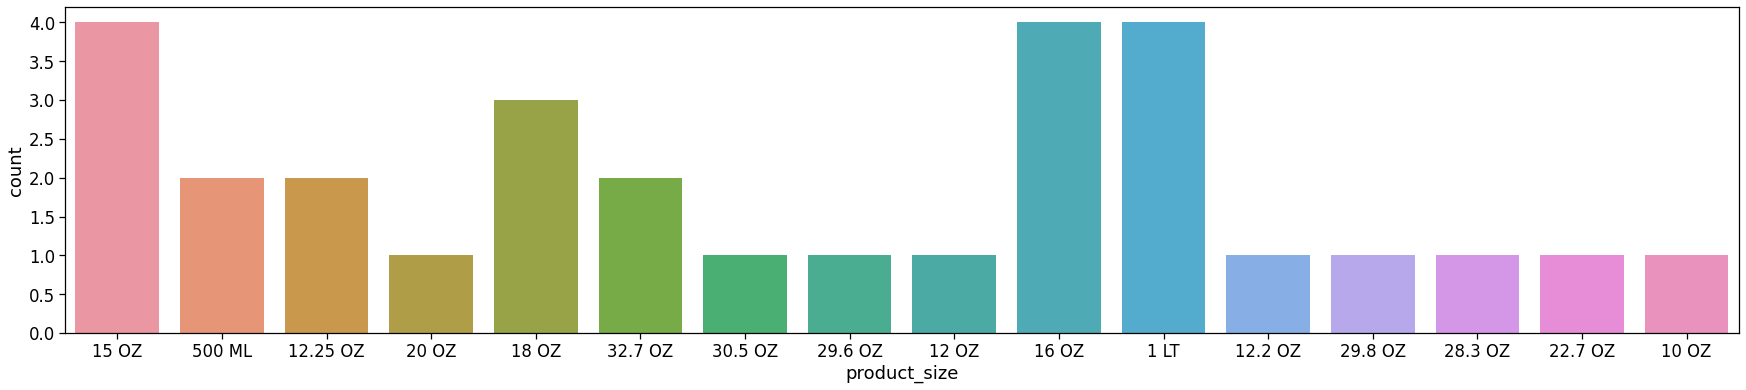

In [ ]:
plt.figure(figsize=(30, 6))
sns.countplot(x='product_size', data=product_data)

In [ ]:
# remove the units from the product size
# we will keep only the values
product_data['product_size'] = product_data.product_size.apply(lambda x: x.split()[0])

In [ ]:
# change data type of product size from string to float
product_data.product_size = product_data.product_size.astype(float)

#### Observation: 

* very product has large size while majoriy has less size
* we need to remove text part from this features before model building

#### Description

In [ ]:
product_data['description'].value_counts()

GM CHEERIOS                  2
PL RAISIN BRAN               1
FRSC BRCK OVN ITL PEP PZ     1
KELL FROSTED FLAKES          1
PL SR CRUST 3 MEAT PIZZA     1
SNYDR PRETZEL RODS           1
RLDGLD PRETZEL STICKS        1
PL TWIST PRETZELS            1
PL HONEY NUT TOASTD OATS     1
PL ANTSPTC SPG MNT MTHWS     1
SCOPE ORIG MINT MOUTHWASH    1
PL MINI TWIST PRETZELS       1
DIGIORNO THREE MEAT          1
PL BT SZ FRSTD SHRD WHT      1
KELL BITE SIZE MINI WHEAT    1
LSTRNE FRS BRST ANTSPC MW    1
DIGRN PEPP PIZZA             1
KELL FROOT LOOPS             1
DIGRN SUPREME PIZZA          1
PL PRETZEL STICKS            1
SNYDR FF MINI PRETZELS       1
GM HONEY NUT CHEERIOS        1
PL SR CRUST PEPPRN PIZZA     1
PL BL MINT ANTSPTC RINSE     1
LSTRNE CL MINT ANTSPTC MW    1
SNYDR SOURDOUGH NIBBLERS     1
RLDGLD TINY TWISTS PRTZL     1
CREST PH CLN MINT RINSE      1
PL SR CRUST SUPRM PIZZA      1
Name: description, dtype: int64

#### Observation:

* Description contain similar information as category and sub category so we will drop description column before model building. 

#### Univariate analysis for Store data

---
### `DATASET 3: STORE DATA`

- **STORE_ID** - store number
- **STORE_NAME** - Name of store
- **ADDRESS_CITY_NAME** - city
- **ADDRESS_STATE_PROV_CODE** - state
- **MSA_CODE** - (Metropolitan Statistical Area) Based on geographic region and population density
- **SEG_VALUE_NAME** - Store Segment Name
- **PARKING_SPACE_QTY** - number of parking spaces in the store parking lot
- **SALES_AREA_SIZE_NUM** - square footage of store
- **AVG_WEEKLY_BASKETS** - average weekly baskets sold in the store

---

In [ ]:
store_data.head()

STORE_ID          STORE_NAME  ... SALES_AREA_SIZE_NUM AVG_WEEKLY_BASKETS
0       367      15TH & MADISON  ...               24721              12707
1       389          SILVERLAKE  ...               46073              24767
2       613          EAST ALLEN  ...               64926              29386
3       623             HOUSTON  ...               46930              36741
4      2277  ANDERSON TOWNE CTR  ...               81958              54053

[5 rows x 9 columns]

In [ ]:
store_data.dtypes

STORE_ID                     int64
STORE_NAME                  object
ADDRESS_CITY_NAME           object
ADDRESS_STATE_PROV_CODE     object
MSA_CODE                     int64
SEG_VALUE_NAME              object
PARKING_SPACE_QTY          float64
SALES_AREA_SIZE_NUM          int64
AVG_WEEKLY_BASKETS           int64
dtype: object

In [ ]:
store_data.describe()

STORE_ID      MSA_CODE  ...  SALES_AREA_SIZE_NUM  AVG_WEEKLY_BASKETS
count     76.000000     76.000000  ...            76.000000           76.000000
mean   14778.657895  21316.842105  ...         48979.973684        24226.921053
std     8809.305289   6246.288329  ...         13695.236699         8863.939362
min      367.000000  13140.000000  ...         10788.000000        10435.000000
25%     6331.000000  17140.000000  ...         42348.000000        16983.500000
50%    15544.000000  19100.000000  ...         48528.000000        24667.500000
75%    23062.500000  26420.000000  ...         54567.750000        29398.500000
max    29159.000000  47540.000000  ...         86517.000000        54053.000000

[8 rows x 5 columns]

In [ ]:
store_data.isnull().sum()

STORE_ID                    0
STORE_NAME                  0
ADDRESS_CITY_NAME           0
ADDRESS_STATE_PROV_CODE     0
MSA_CODE                    0
SEG_VALUE_NAME              0
PARKING_SPACE_QTY          51
SALES_AREA_SIZE_NUM         0
AVG_WEEKLY_BASKETS          0
dtype: int64

In [ ]:
store_data.nunique()

STORE_ID                   76
STORE_NAME                 72
ADDRESS_CITY_NAME          51
ADDRESS_STATE_PROV_CODE     4
MSA_CODE                    9
SEG_VALUE_NAME              3
PARKING_SPACE_QTY          23
SALES_AREA_SIZE_NUM        72
AVG_WEEKLY_BASKETS         76
dtype: int64

In [ ]:
store_data.shape

(76, 9)

In [ ]:
# convert column names into lowercase
store_data= store_data.rename(columns=str.lower)

#### Observation;

* Store data has 76 rows and 9 columns
* parking space qty feature has 51 missing values
* We have combination of fetaures categorical and numerical
* each feature has multiple unique values
* We have to check outliers for numerical features
* MSA code is a categorical feature so we have to change datatype  

Univariate Analysis

#### Sales area size num

In [ ]:
store_data['sales_area_size_num'] = store_data['sales_area_size_num'].astype('int64')

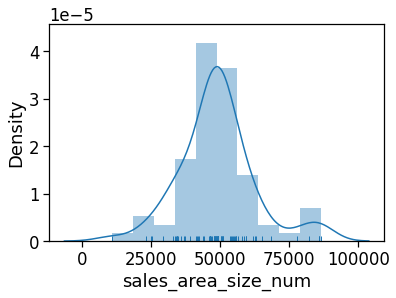

In [ ]:
sns.distplot(store_data['sales_area_size_num'], rug=True, kde=True, bins=10)

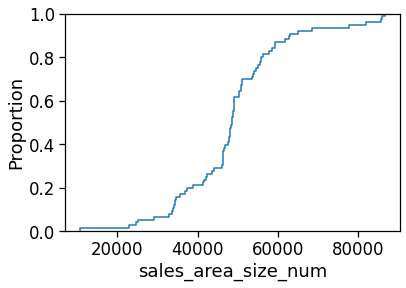

In [ ]:
sns.ecdfplot(data=store_data, x='sales_area_size_num')

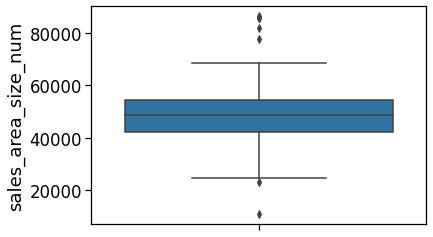

In [ ]:
# box-plot for units after removing outliers
sns.boxplot(y="sales_area_size_num", data=store_data)
plt.show()

#### Observation:

* Majority store's sales area size number around 40000 to 60000
* 30% probabilty that sales area size number is under 50000 while 90% probability that sales area size number is under 70000
* Sales are size num has some outliers which is around 80000 

#### Average weekly baskets

In [ ]:
store_data['avg_weekly_baskets'] = store_data['avg_weekly_baskets'].astype('int64')

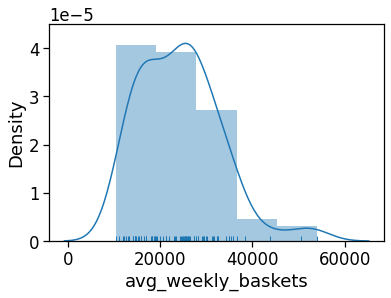

In [ ]:
sns.distplot(store_data['avg_weekly_baskets'], rug=True, kde=True, bins=5)

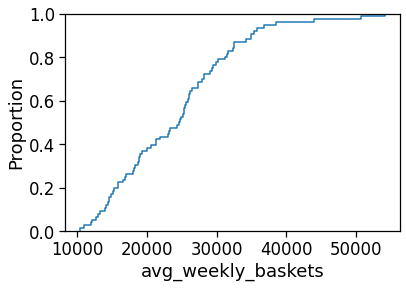

In [ ]:
sns.ecdfplot(data=store_data, x='avg_weekly_baskets')

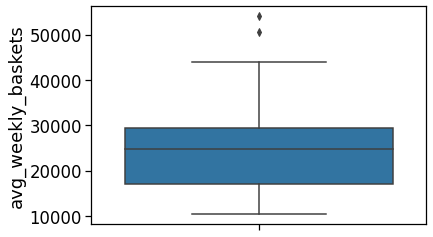

In [ ]:
# box-plot for units after removing outliers
sns.boxplot(y="avg_weekly_baskets", data=store_data)
plt.show()

#### Observatin:

* 90% probability that avg weekly baskets are under 40000
* Majority avg weekly baskets lies between 18000 to 30000
* Avg weekly baskets has some outliers which is above 50000

#### Parking space qty

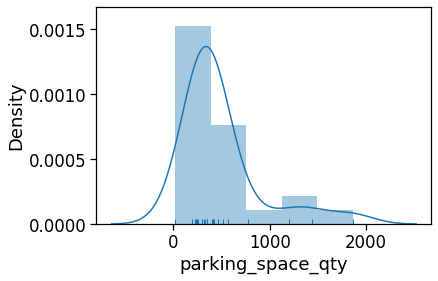

In [ ]:
sns.distplot(store_data['parking_space_qty'], rug=True, kde=True, bins=5)

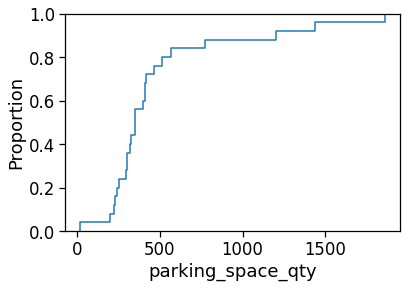

In [ ]:
sns.ecdfplot(data=store_data, x='parking_space_qty')

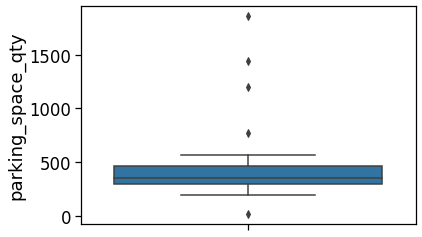

In [ ]:
# box-plot for units after removing outliers
sns.boxplot(y="parking_space_qty", data=store_data)
plt.show()

#### Observation:

* We have only 25 obsevation 
* 80% probability says parking space qty lies between 240 to 500
* It has some outlier which is above 500
* Since we have few observation we will further investigate this featuer before model building

#### MSA code

In [ ]:
store_data['msa_code'] = store_data['msa_code'].astype('category')

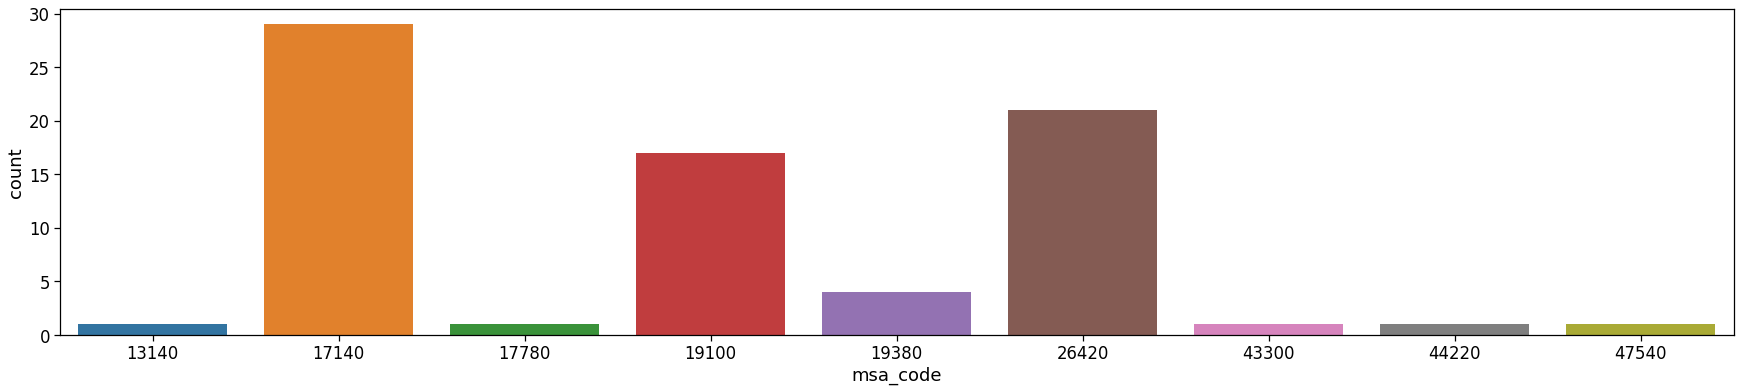

In [ ]:
plt.figure(figsize=(30, 6))
sns.countplot(x='msa_code', data=store_data)

In [ ]:
store_data['msa_code'].value_counts()

17140    29
26420    21
19100    17
19380     4
47540     1
44220     1
43300     1
17780     1
13140     1
Name: msa_code, dtype: int64

#### Observation:

* We have 9 different msa code
* Three msa code category has very goog geographic and product popularity
* Six category has very less popularity as we can see from plot

#### Seg value name

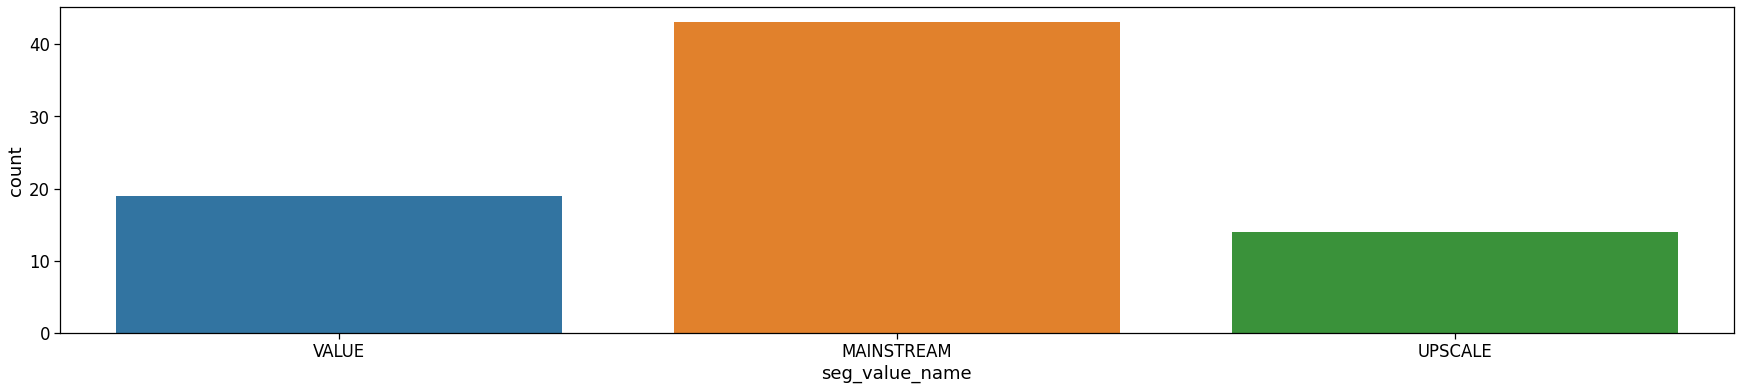

In [ ]:
plt.figure(figsize=(30, 6))
sns.countplot(x='seg_value_name', data=store_data)

#### Observation:

* We have major three category for store segment name
* Mainstream store has around 40 while other two value and upscale is around 15 to 20

#### Address state prov code

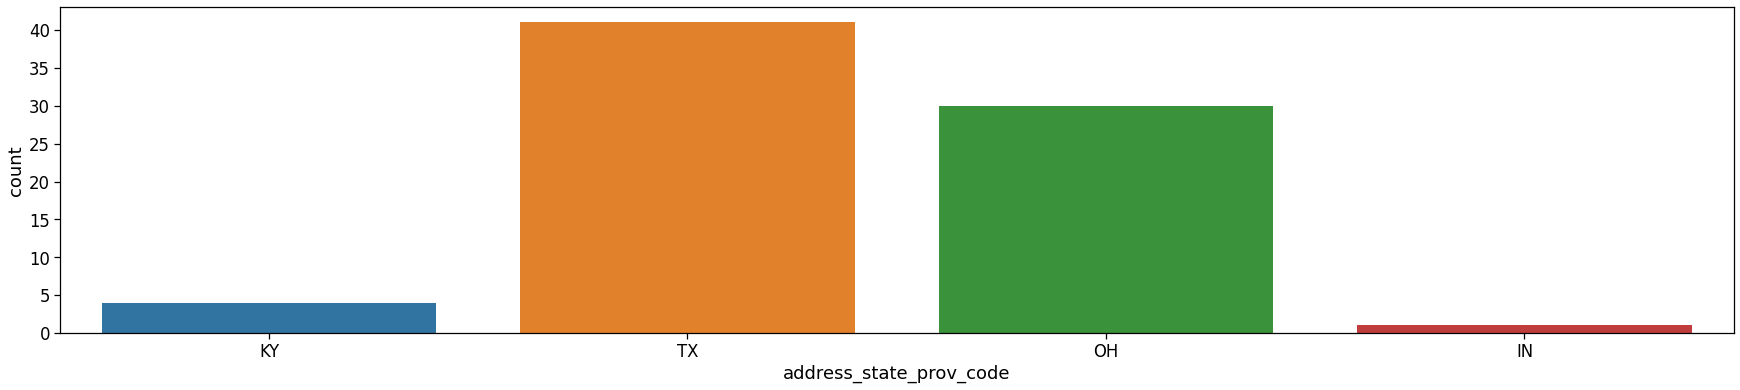

In [ ]:
plt.figure(figsize=(30, 6))
sns.countplot(x='address_state_prov_code', data=store_data)

In [ ]:
store_data['address_state_prov_code'].value_counts()

TX    41
OH    30
KY     4
IN     1
Name: address_state_prov_code, dtype: int64

#### Observation:

* We have stores in major four state 
* Taxas has 41 store, Ohio has 30 dstore while KY and IN has 4 and 1 store respectively

#### STORE_ID  
#### STORE_NAME  
#### ADDRESS_CITY_NAME  

In [ ]:
store_data['store_name'].value_counts()

HOUSTON           4
MIDDLETOWN        2
INDEPENDENCE      1
EAST ALLEN        1
LIBERTY TWP.      1
                 ..
SUGARLAND         1
MAINEVILLE        1
PINEWOOD          1
WHIPP & BIGGER    1
FLOWER MOUND      1
Name: store_name, Length: 72, dtype: int64

In [ ]:
store_data['address_city_name'].value_counts()

CINCINNATI         9
HOUSTON            8
MIDDLETOWN         3
MAINEVILLE         2
KATY               2
HAMILTON           2
DAYTON             2
SUGAR LAND         2
LOVELAND           2
MCKINNEY           2
COVINGTON          2
FRISCO             1
GARLAND            1
CYPRESS            1
RICHARDSON         1
BEAUMONT           1
FLOWER MOUND       1
MAGNOLIA           1
CLUTE              1
GRAND PRAIRIE      1
WOODLANDS          1
GOSHEN             1
THE WOODLANDS      1
MILFORD            1
MASON              1
ROCKWALL           1
DICKINSON          1
DALLAS             1
LAWRENCEBURG       1
SHERMAN            1
ARLINGTON          1
ALLEN              1
BLUE ASH           1
MESQUITE           1
SAINT MARYS        1
PASADENA           1
VANDALIA           1
DENTON             1
SPRINGFIELD        1
COLLEGE STATION    1
KINGWOOD           1
LEBANON            1
DUNCANVILLE        1
KETTERING          1
BAYTOWN            1
WEST CHESTER       1
SOUTHLAKE          1
INDEPENDENCE 

#### Observation;

* Hoston and middletown has 4 and 2 store name respectively while others have only 1 store name. In total, we have 72 different store name
* Only CINCINNATI, HOUSTON and MIDDLETOWN has 9, 8 and 3 store respectively while majority has only 1 and 2 store. In total, we have 51 city in out list

#### Bivariate analysis

* First we merge all three datasets for detailed analysis
* We will crate some time based features for data analytics

In [ ]:
merged_data = train.merge(product_data, how= 'left', on= 'upc')
merged_data = merged_data.merge(store_data,how='left', left_on = 'store_num', right_on='store_id')

In [ ]:
merged_data.head(2)

week_end_date  store_num  ...  sales_area_size_num  avg_weekly_baskets
0    2009-01-14        367  ...                24721               12707
1    2009-01-14        367  ...                24721               12707

[2 rows x 21 columns]

In [ ]:
merged_data.columns

Index(['week_end_date', 'store_num', 'upc', 'base_price', 'feature', 'display',
       'units', 'description', 'manufacturer', 'category', 'sub_category',
       'product_size', 'store_id', 'store_name', 'address_city_name',
       'address_state_prov_code', 'msa_code', 'seg_value_name',
       'parking_space_qty', 'sales_area_size_num', 'avg_weekly_baskets'],
      dtype='object')

In [ ]:
merged_data.shape

(232056, 21)

* We have total 28 columns now 
* Let's create some time based features

In [ ]:
def time_feature(df):
  # year
  merged_data['year']  = merged_data['week_end_date'].dt.year
  # month
  merged_data['month'] = merged_data['week_end_date'].dt.month
  # day
  merged_data['day'] = merged_data['week_end_date'].dt.day
  # day_of year
  merged_data['day_of_year'] = merged_data['week_end_date'].dt.dayofyear
  # week 
  merged_data["week"] = merged_data['week_end_date'].dt.week
  # quarter
  merged_data["quarter"] = merged_data['week_end_date'].dt.quarter

  return df

In [ ]:
merged_data.dtypes

week_end_date              datetime64[ns]
store_num                           int64
upc                                 int64
base_price                        float64
feature                             int64
display                             int64
units                               int64
description                        object
manufacturer                       object
category                           object
sub_category                       object
product_size                      float64
store_id                            int64
store_name                         object
address_city_name                  object
address_state_prov_code            object
msa_code                         category
seg_value_name                     object
parking_space_qty                 float64
sales_area_size_num                 int64
avg_weekly_baskets                  int64
dtype: object

In [ ]:
merged_data['feature'] = merged_data['feature'].astype('category')
merged_data['display'] = merged_data['display'].astype('category')

In [ ]:
merged_data.nunique()

week_end_date              142
store_num                   76
upc                         30
base_price                 624
feature                      2
display                      2
units                      379
description                 29
manufacturer                 9
category                     4
sub_category                 7
product_size                16
store_id                    76
store_name                  72
address_city_name           51
address_state_prov_code      4
msa_code                     9
seg_value_name               3
parking_space_qty           23
sales_area_size_num         72
avg_weekly_baskets          76
dtype: int64

In [ ]:
time_feature(merged_data)

week_end_date  store_num         upc  ...  day_of_year week quarter
0         2009-01-14        367  1111009477  ...           14    3       1
1         2009-01-14        367  1111009497  ...           14    3       1
2         2009-01-14        367  1111085319  ...           14    3       1
3         2009-01-14        367  1111085345  ...           14    3       1
4         2009-01-14        367  1111085350  ...           14    3       1
...              ...        ...         ...  ...          ...  ...     ...
232051    2011-09-28      29159  7192100336  ...          271   39       3
232052    2011-09-28      29159  7192100337  ...          271   39       3
232053    2011-09-28      29159  7192100339  ...          271   39       3
232054    2011-09-28      29159  7797502248  ...          271   39       3
232055    2011-09-28      29159  7797508004  ...          271   39       3

[232056 rows x 27 columns]

#### time feature with units sales

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Month vs Units Sales')

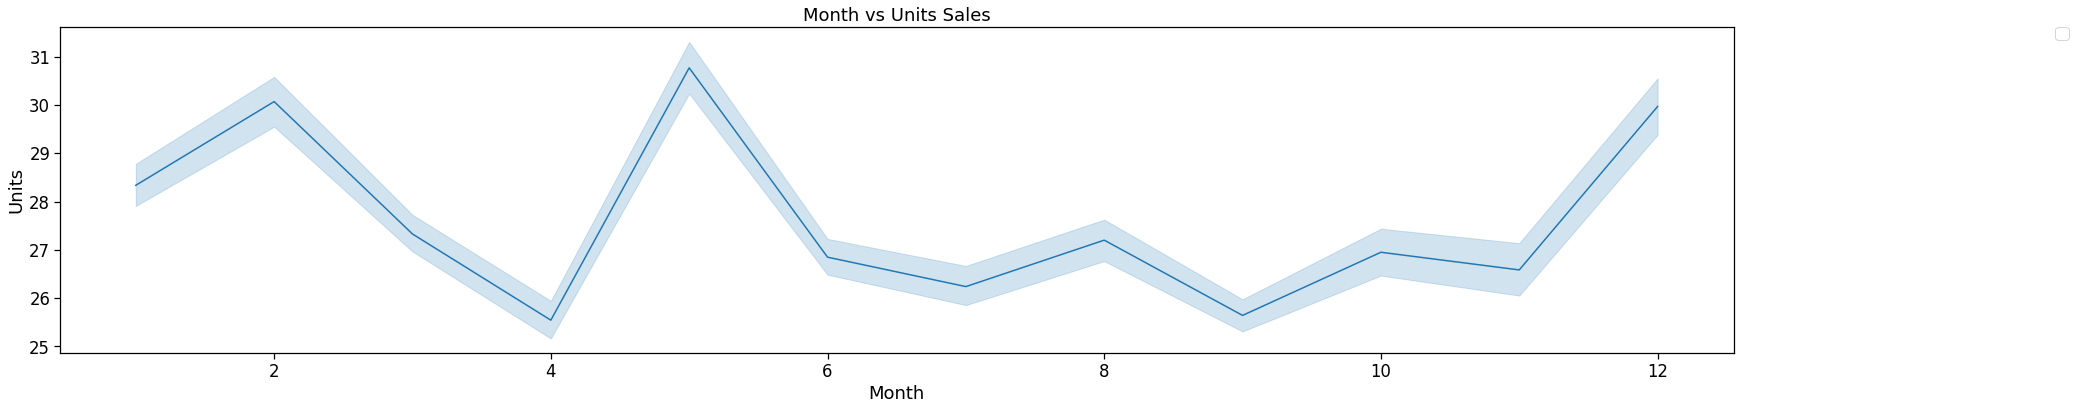

In [ ]:
plt.figure(figsize=(30, 6))
sns.lineplot(x="month", y="units", data=merged_data, palette="Set2")
plt.xlabel("Month")
plt.ylabel("Units")
plt.legend(bbox_to_anchor=(1.2, 1),borderaxespad=0)
plt.title("Month vs Units Sales")

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Day vs Units Sales')

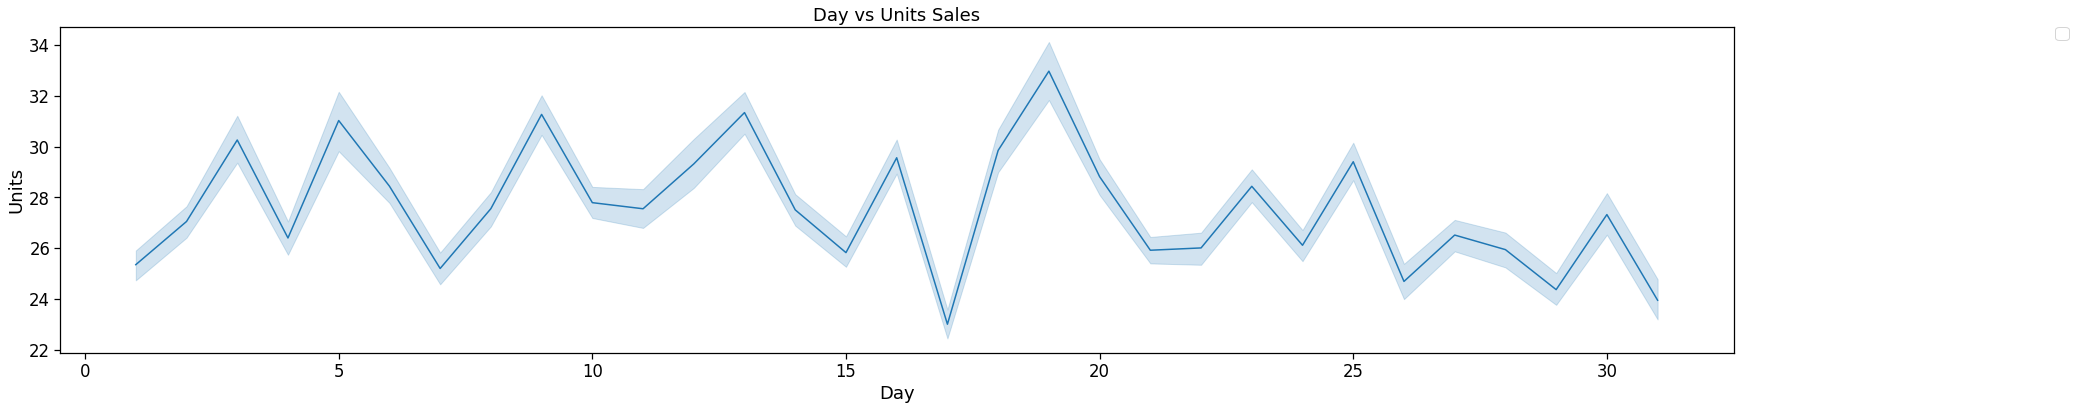

In [ ]:
plt.figure(figsize=(30, 6))
sns.lineplot(x="day", y="units", data=merged_data, palette="Set2")
plt.xlabel("Day")
plt.ylabel("Units")
plt.legend(bbox_to_anchor=(1.2, 1),borderaxespad=0)
plt.title("Day vs Units Sales")

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Year vs Units Sales')

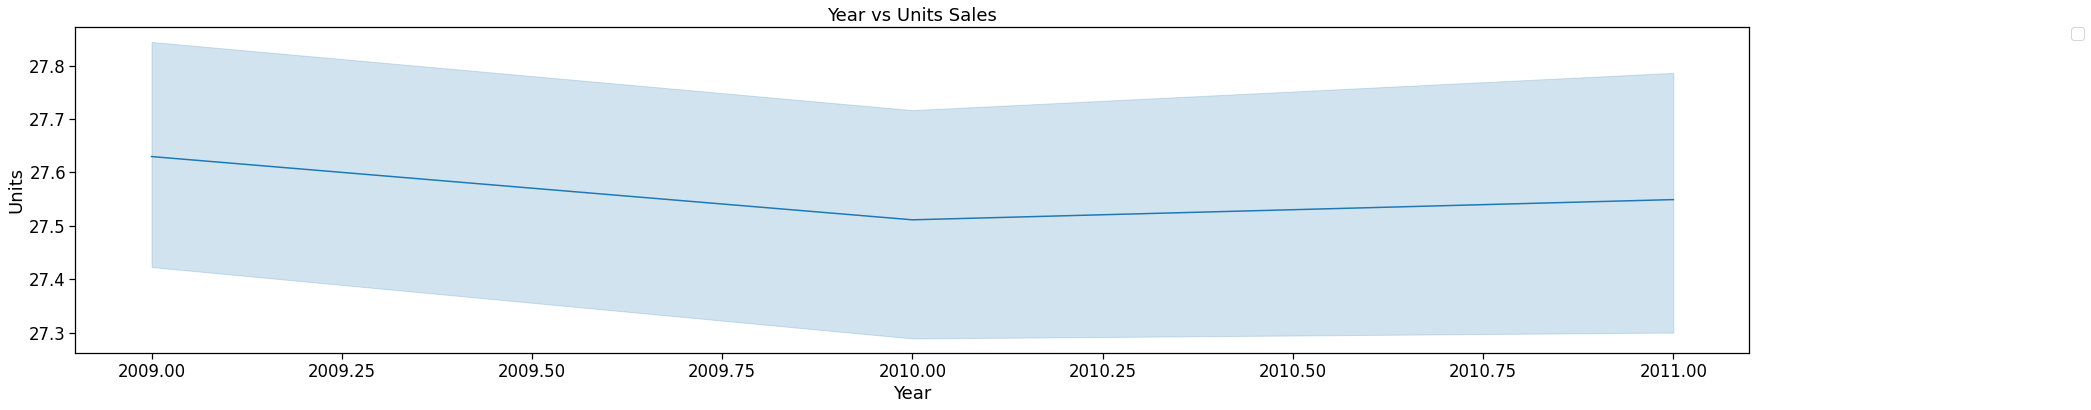

In [ ]:
plt.figure(figsize=(30, 6))
sns.lineplot(x="year", y="units", data=merged_data, palette="Set2")
plt.xlabel("Year")
plt.ylabel("Units")
plt.legend(bbox_to_anchor=(1.2, 1),borderaxespad=0)
plt.title("Year vs Units Sales")

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Week vs Units Sales')

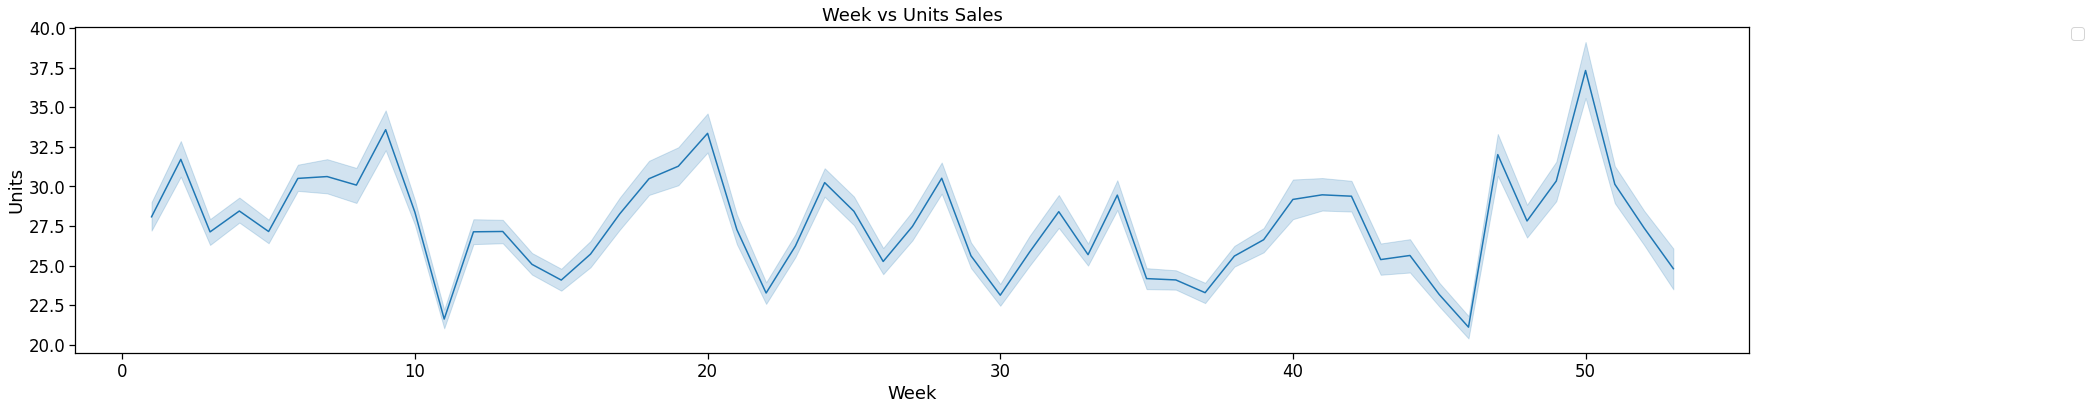

In [ ]:
plt.figure(figsize=(30, 6))
sns.lineplot(x="week", y="units", data=merged_data, palette="Set2")
plt.xlabel("Week")
plt.ylabel("Units")
plt.legend(bbox_to_anchor=(1.2, 1),borderaxespad=0)
plt.title("Week vs Units Sales")

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Quarter vs Units Sales')

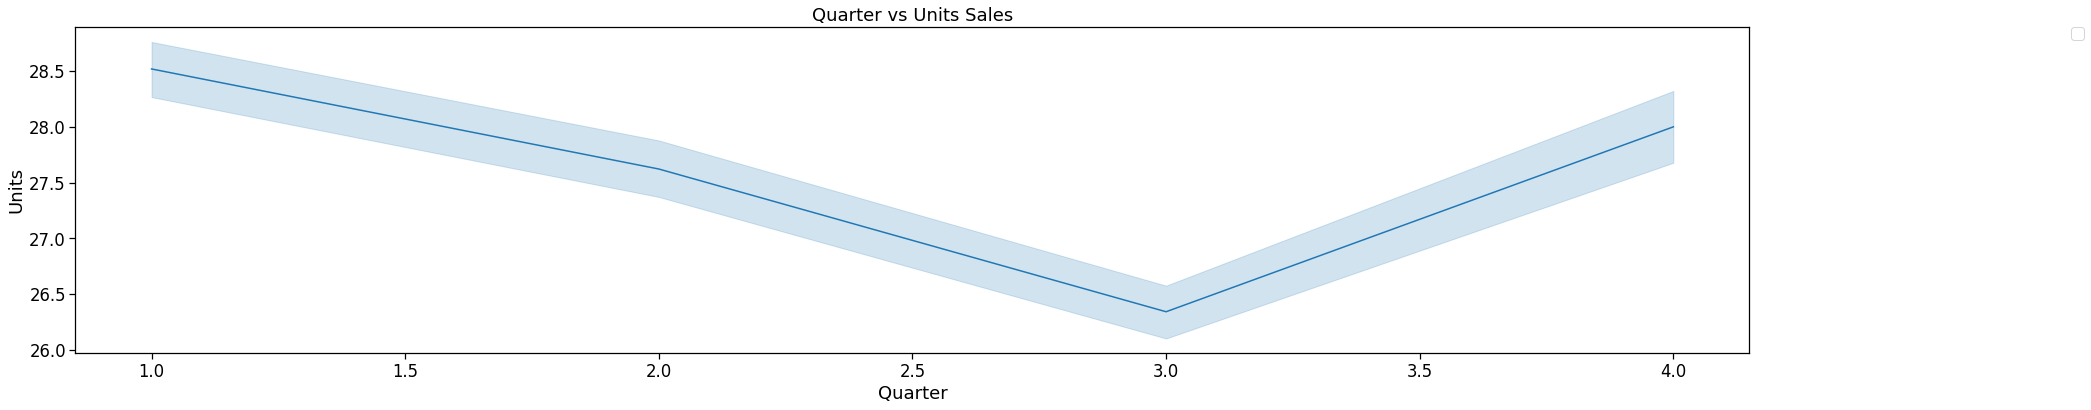

In [ ]:
plt.figure(figsize=(30, 6))
sns.lineplot(x="quarter", y="units", data=merged_data, palette="Set2")
plt.xlabel("Quarter")
plt.ylabel("Units")
plt.legend(bbox_to_anchor=(1.2, 1),borderaxespad=0)
plt.title("Quarter vs Units Sales")

No handles with labels found to put in legend.


Text(0.5, 1.0, 'day_of_year vs Units Sales')

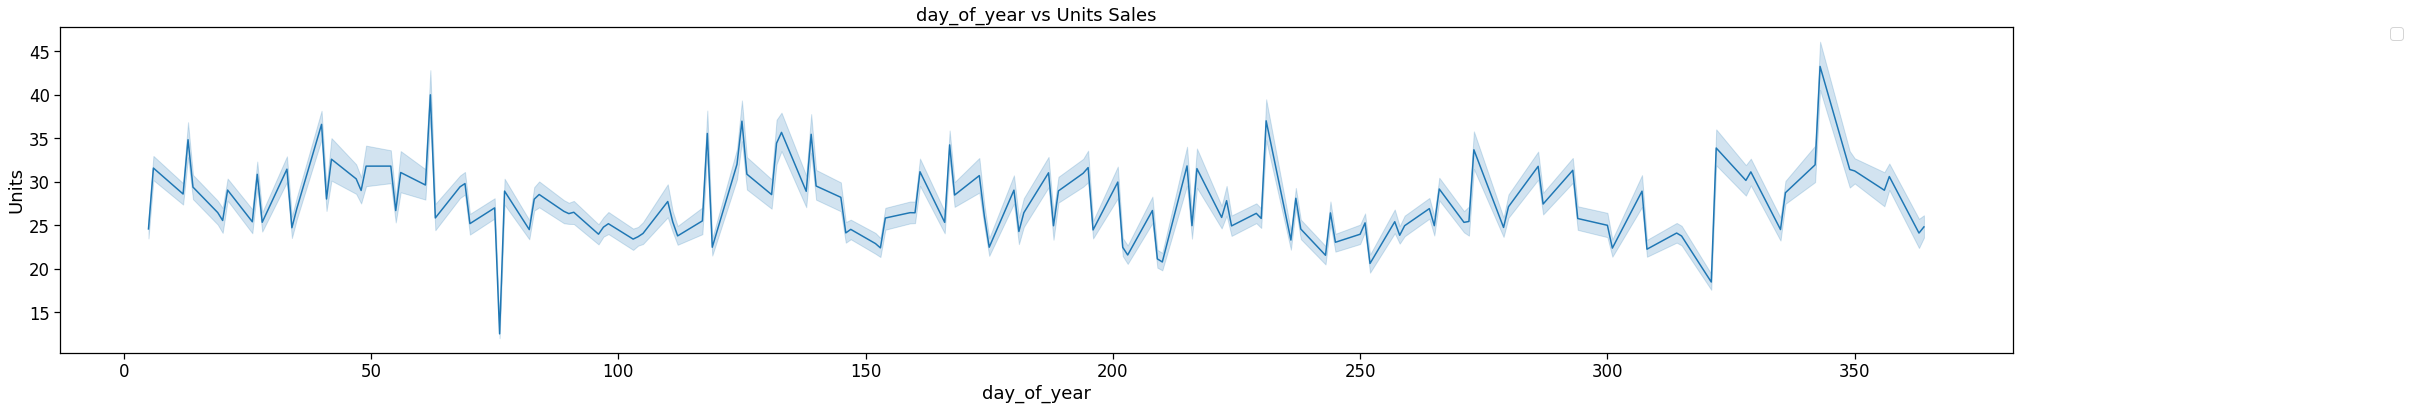

In [ ]:
plt.figure(figsize=(35, 6))
sns.lineplot(x="day_of_year", y="units", data=merged_data, palette="Set2")
plt.xlabel("day_of_year")
plt.ylabel("Units")
plt.legend(bbox_to_anchor=(1.2, 1),borderaxespad=0)
plt.title("day_of_year vs Units Sales")

#### Time feature vs base price

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Month vs Base Price')

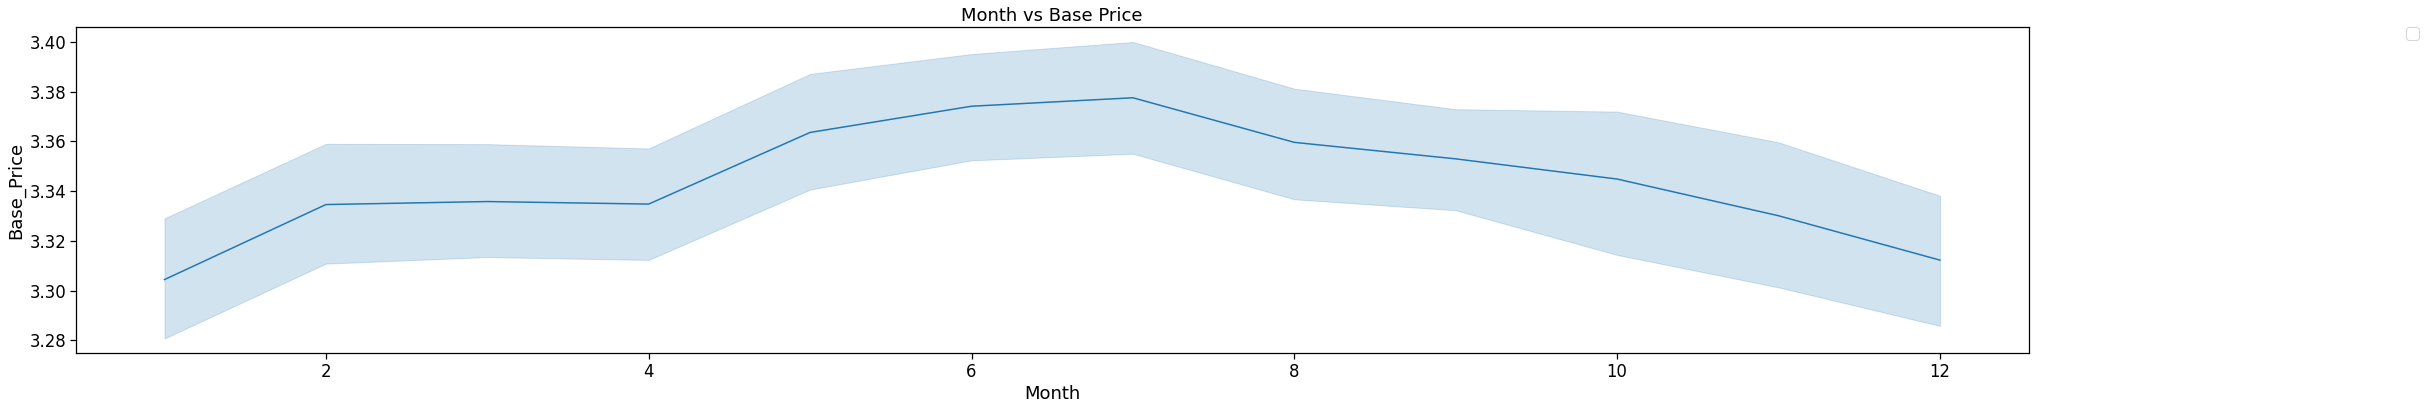

In [ ]:
plt.figure(figsize=(35, 6))
sns.lineplot(x="month", y="base_price", data=merged_data, palette="Set2")
plt.xlabel("Month")
plt.ylabel("Base_Price")
plt.legend(bbox_to_anchor=(1.2, 1),borderaxespad=0)
plt.title("Month vs Base Price")

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Day vs Base Price')

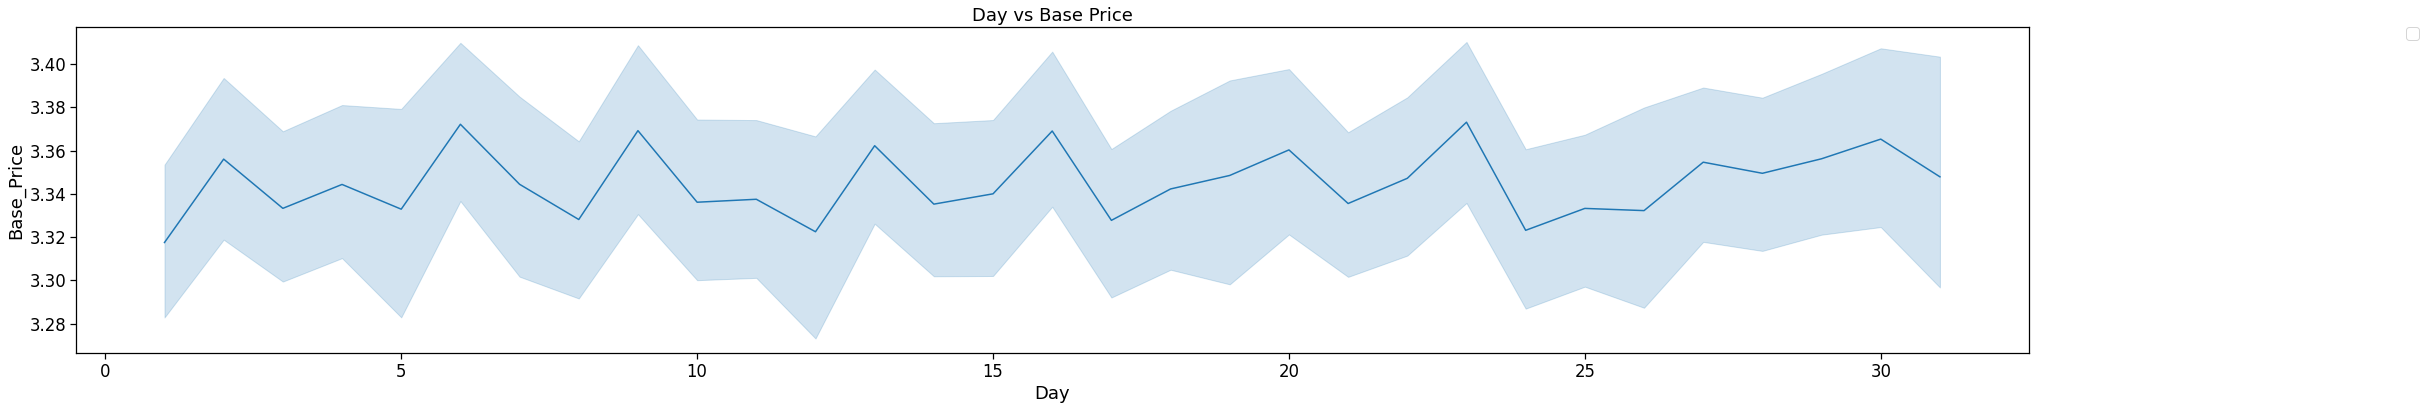

In [ ]:
plt.figure(figsize=(35, 6))
sns.lineplot(x="day", y="base_price", data=merged_data, palette="Set2")
plt.xlabel("Day")
plt.ylabel("Base_Price")
plt.legend(bbox_to_anchor=(1.2, 1),borderaxespad=0)
plt.title("Day vs Base Price")

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Week vs Base Price')

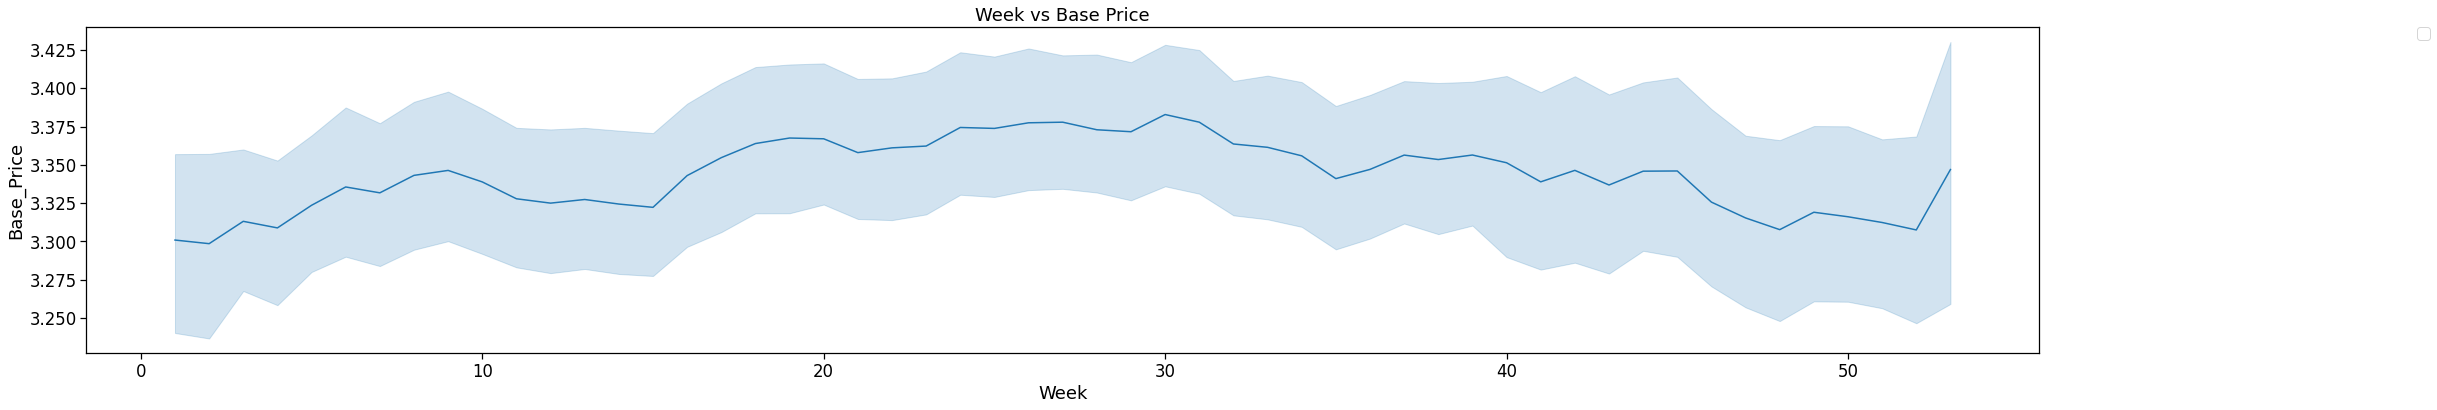

In [ ]:
plt.figure(figsize=(35, 6))
sns.lineplot(x="week", y="base_price", data=merged_data, palette="Set2")
plt.xlabel("Week")
plt.ylabel("Base_Price")
plt.legend(bbox_to_anchor=(1.2, 1),borderaxespad=0)
plt.title("Week vs Base Price")

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Year vs Base Price')

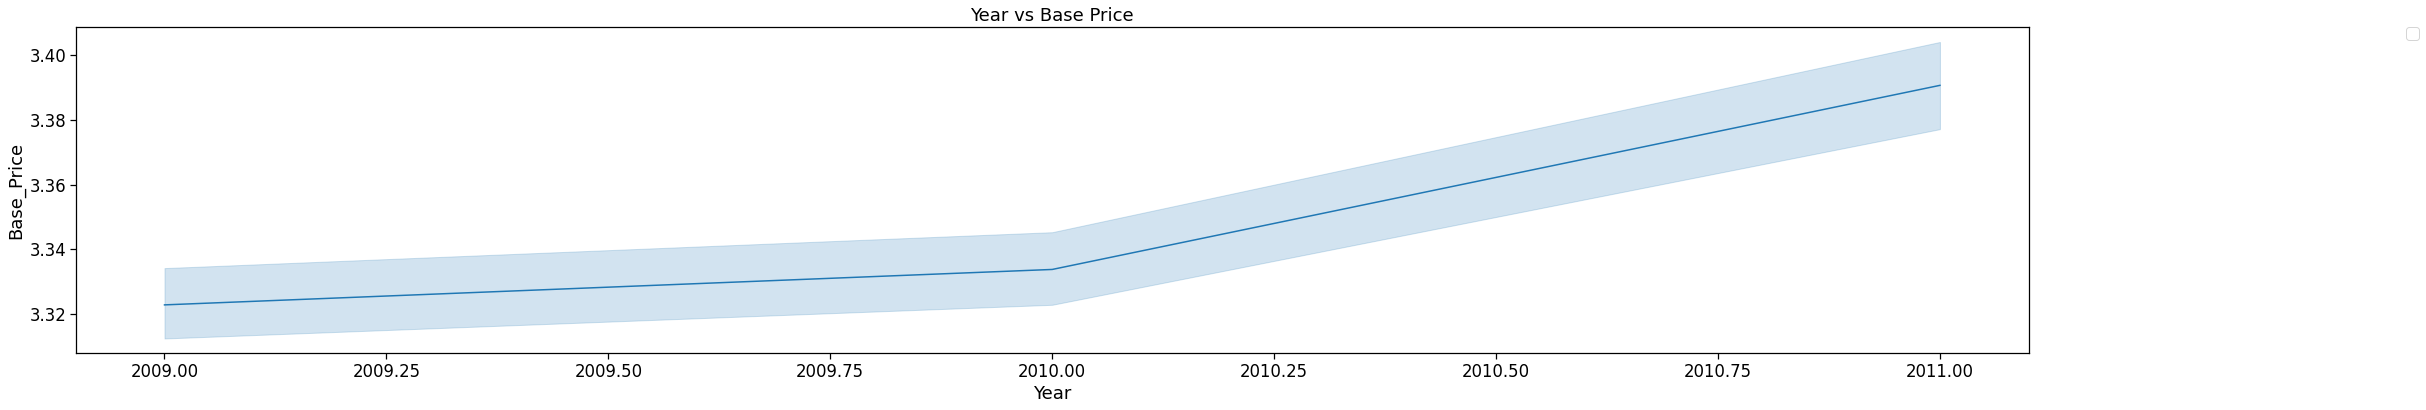

In [ ]:
plt.figure(figsize=(35, 6))
sns.lineplot(x="year", y="base_price", data=merged_data, palette="Set2")
plt.xlabel("Year")
plt.ylabel("Base_Price")
plt.legend(bbox_to_anchor=(1.2, 1),borderaxespad=0)
plt.title("Year vs Base Price")

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Day_of_year vs Base Price')

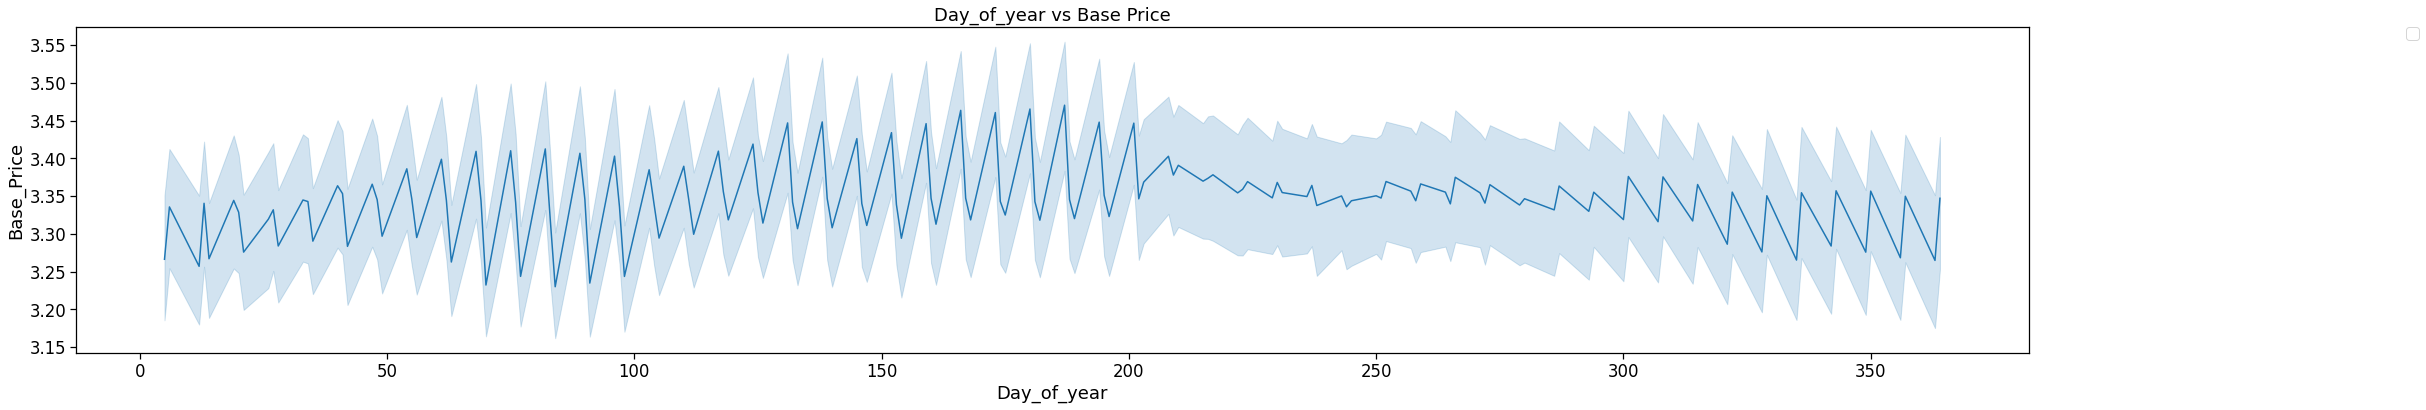

In [ ]:
plt.figure(figsize=(35, 6))
sns.lineplot(x="day_of_year", y="base_price", data=merged_data, palette="Set2")
plt.xlabel("Day_of_year")
plt.ylabel("Base_Price")
plt.legend(bbox_to_anchor=(1.2, 1),borderaxespad=0)
plt.title("Day_of_year vs Base Price")

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Quarter vs Base Price')

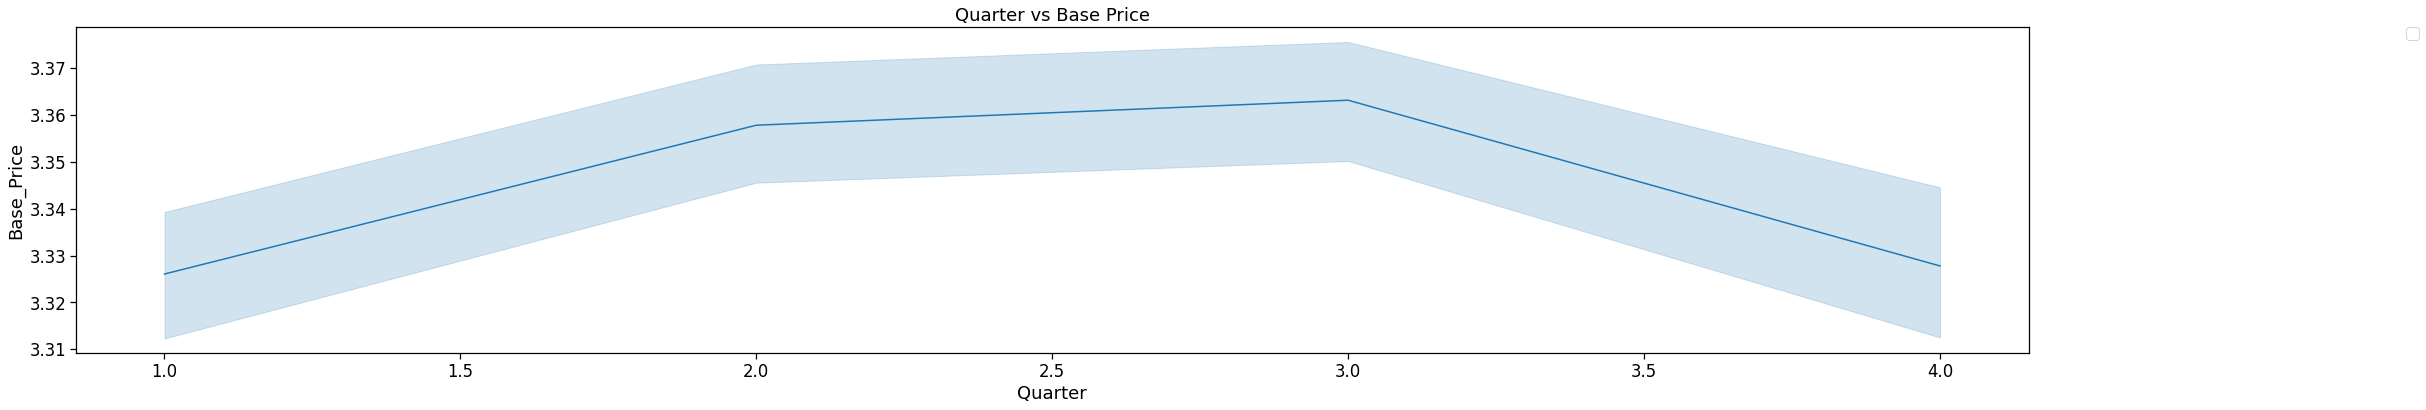

In [ ]:
plt.figure(figsize=(35, 6))
sns.lineplot(x="quarter", y="base_price", data=merged_data, palette="Set2")
plt.xlabel("Quarter")
plt.ylabel("Base_Price")
plt.legend(bbox_to_anchor=(1.2, 1),borderaxespad=0)
plt.title("Quarter vs Base Price")

#### Time feature vs avg weekly baskets

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Month vs Avg Weekly Baskets')

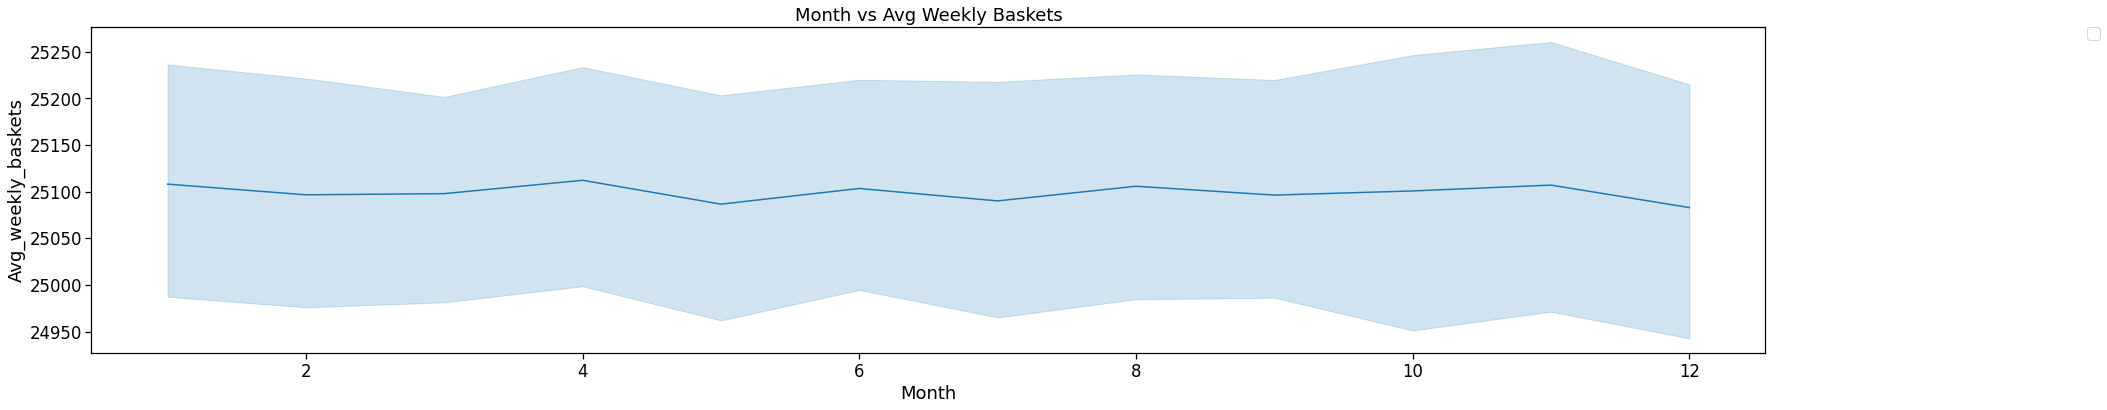

In [ ]:
plt.figure(figsize=(30, 6))
sns.lineplot(x="month", y="avg_weekly_baskets", data=merged_data, palette="Set2")
plt.xlabel("Month")
plt.ylabel("Avg_weekly_baskets")
plt.legend(bbox_to_anchor=(1.2, 1),borderaxespad=0)
plt.title("Month vs Avg Weekly Baskets")

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Day vs Avg Weekly Baskets')

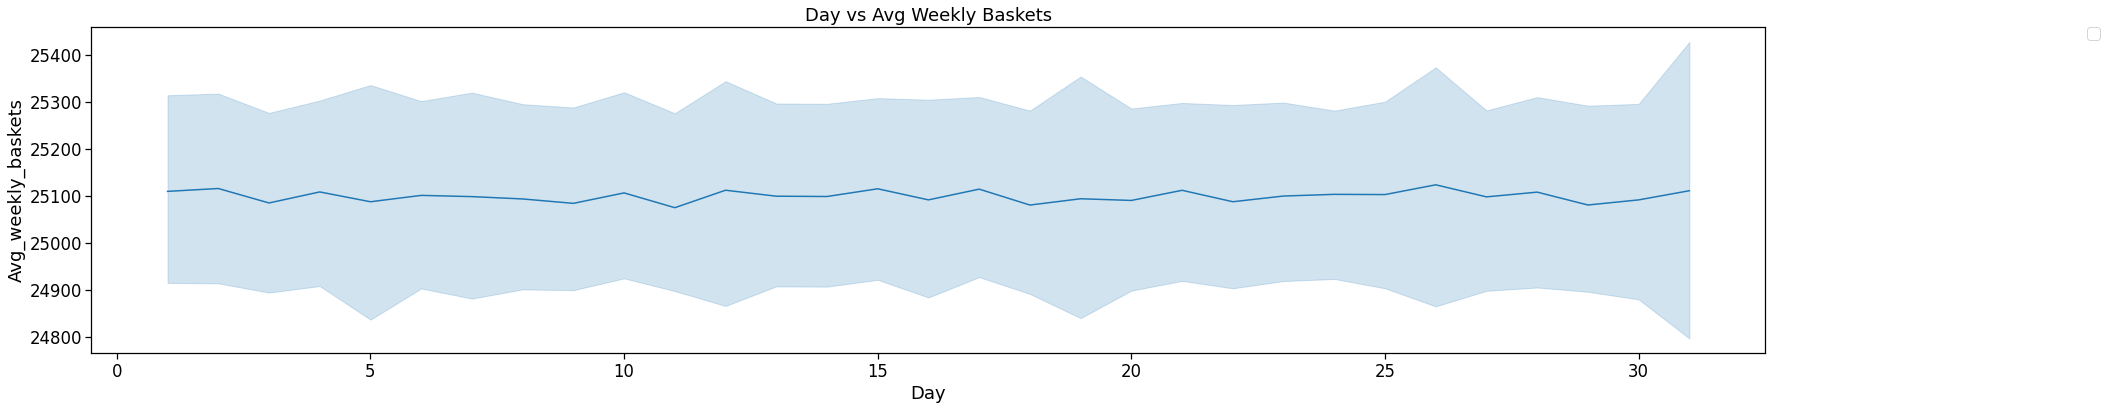

In [ ]:
plt.figure(figsize=(30, 6))
sns.lineplot(x="day", y="avg_weekly_baskets", data=merged_data, palette="Set2")
plt.xlabel("Day")
plt.ylabel("Avg_weekly_baskets")
plt.legend(bbox_to_anchor=(1.2, 1),borderaxespad=0)
plt.title("Day vs Avg Weekly Baskets")

#### Numerical vs Units 

No handles with labels found to put in legend.


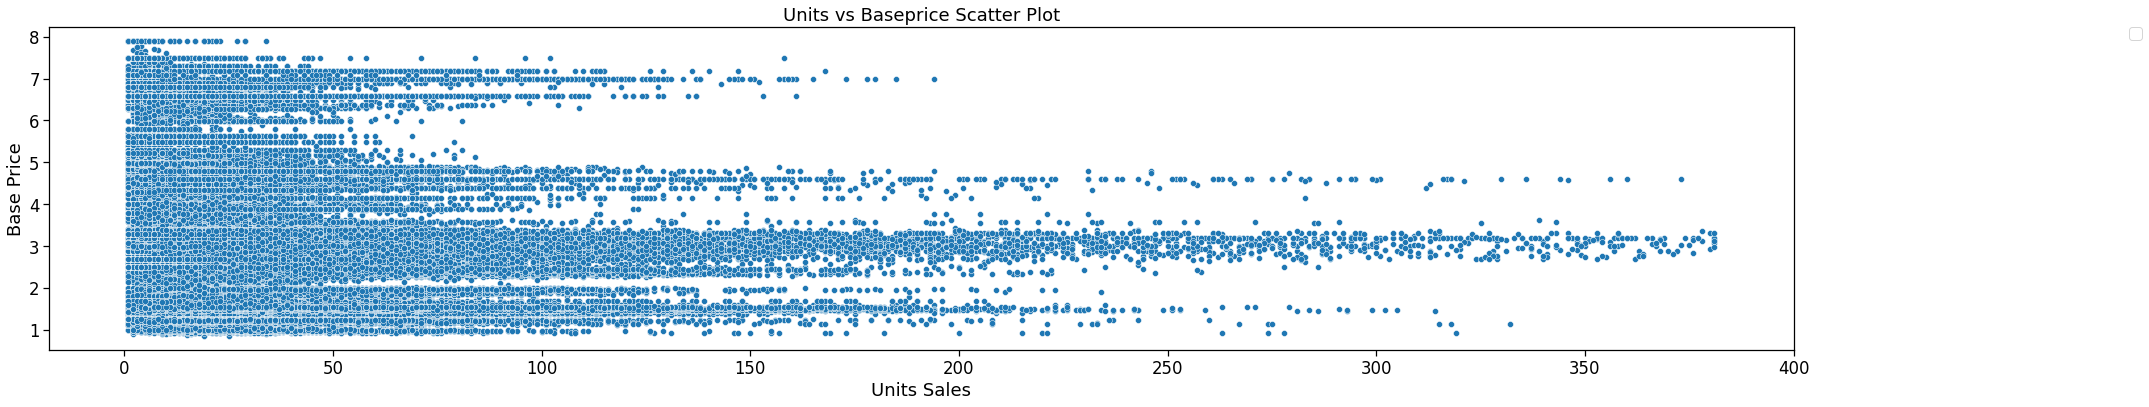

In [ ]:
plt.figure(figsize=(30, 6))
sns.scatterplot(x="units", y="base_price", data=merged_data, palette="Set2")
plt.xlabel("Units Sales")
plt.ylabel("Base Price")
plt.legend(bbox_to_anchor=(1.2, 1),borderaxespad=0)
plt.title("Units vs Baseprice Scatter Plot")
plt.tight_layout()

No handles with labels found to put in legend.


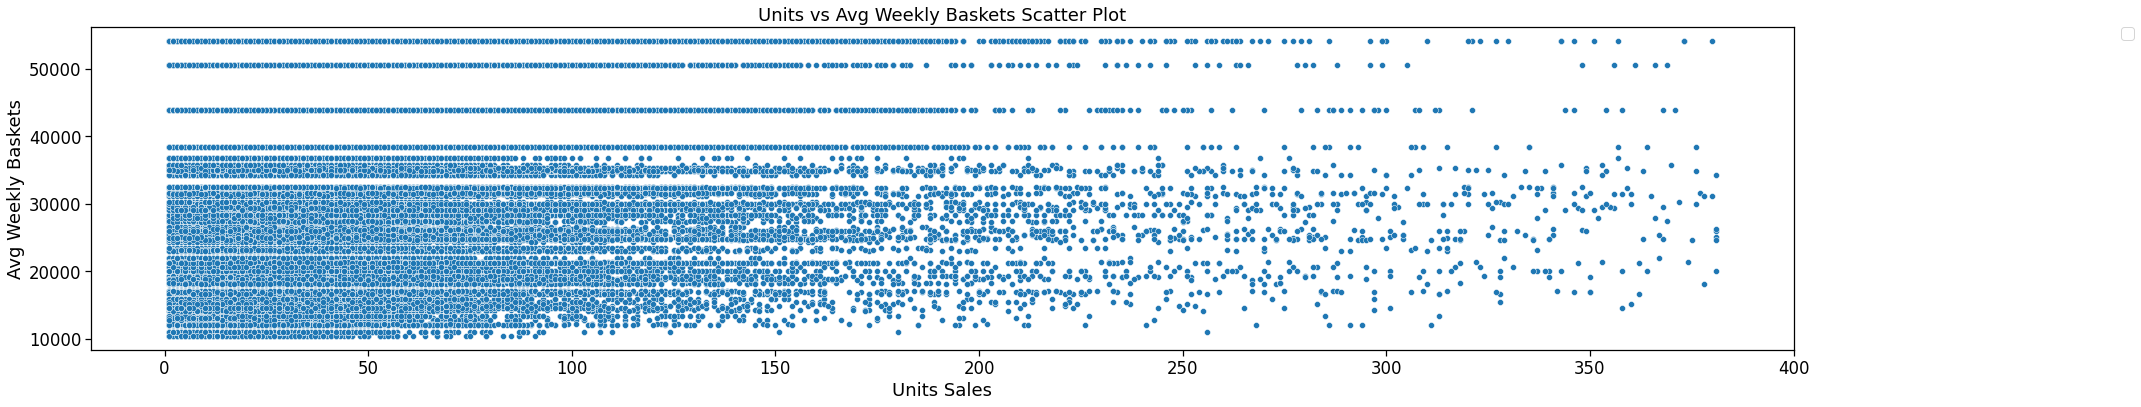

In [ ]:
plt.figure(figsize=(30, 6))
sns.scatterplot(x="units", y="avg_weekly_baskets", data=merged_data, palette="Set2")
plt.xlabel("Units Sales")
plt.ylabel("Avg Weekly Baskets")
plt.legend(bbox_to_anchor=(1.2, 1),borderaxespad=0)
plt.title("Units vs Avg Weekly Baskets Scatter Plot")
plt.tight_layout()

#### Categorical vs Units

Text(0.5, 1.0, 'Frequency of units sales by feature')

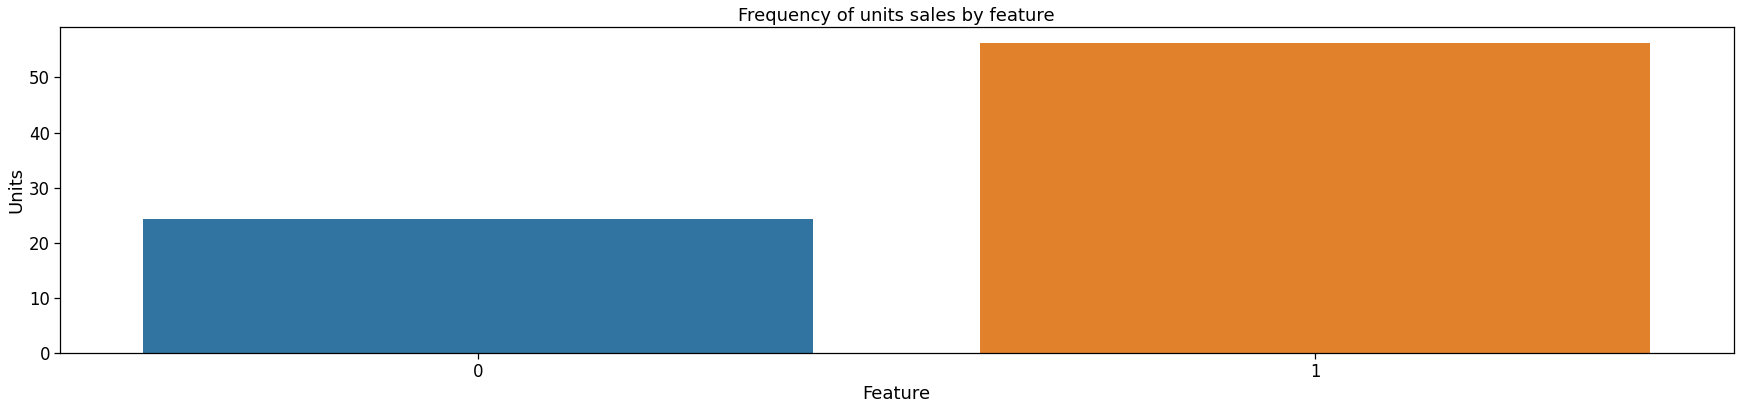

In [ ]:
plt.figure(figsize=(30, 6))
group_2=merged_data.groupby('feature').units.mean()
sns.barplot(group_2.index, group_2.values)
plt.ylabel('Units')
plt.xlabel('Feature')
plt.title('Frequency of units sales by feature')

Text(0.5, 1.0, 'Frequency of units sales by display')

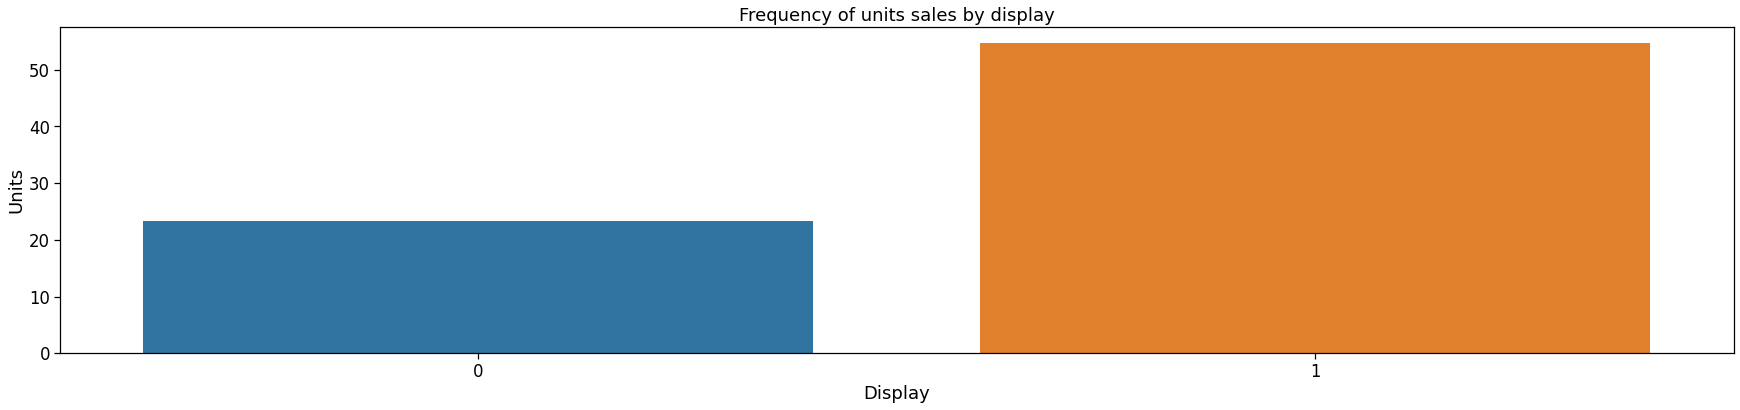

In [ ]:
plt.figure(figsize=(30, 6))
group_2=merged_data.groupby('display').units.mean()
sns.barplot(group_2.index, group_2.values)
plt.ylabel('Units')
plt.xlabel('Display')
plt.title('Frequency of units sales by display')

Text(0.5, 1.0, 'Frequency of units sales by each category')

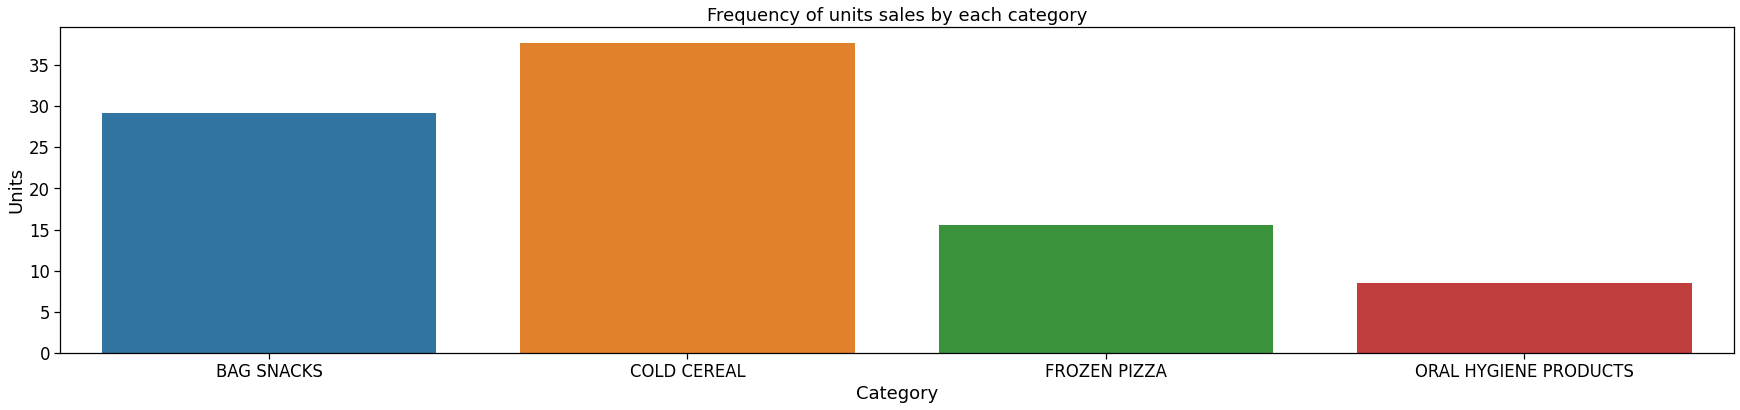

In [ ]:
plt.figure(figsize=(30, 6))
group_2=merged_data.groupby('category').units.mean()
sns.barplot(group_2.index, group_2.values)
plt.ylabel('Units')
plt.xlabel('Category')
plt.title('Frequency of units sales by each category')

Text(0.5, 1.0, 'Frequency of units sales by each sub category')

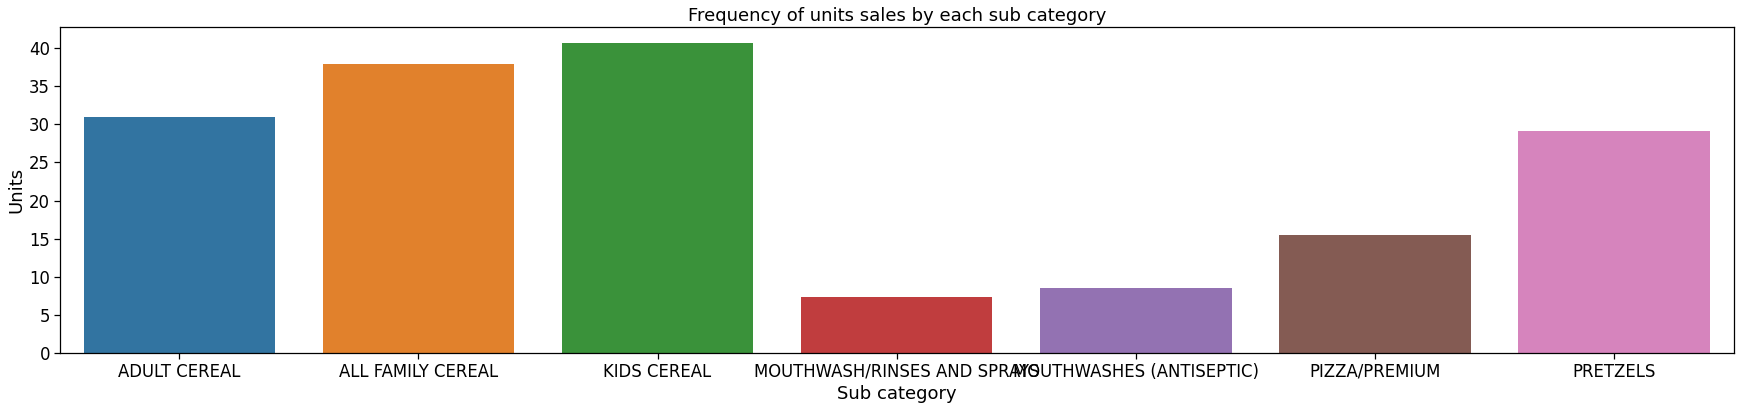

In [ ]:
plt.figure(figsize=(30, 6))
group_2=merged_data.groupby('sub_category').units.mean()
sns.barplot(group_2.index, group_2.values)
plt.ylabel('Units')
plt.xlabel('Sub category')
plt.title('Frequency of units sales by each sub category')

Text(0.5, 1.0, 'Frequency of units sales by each manufacturer ')

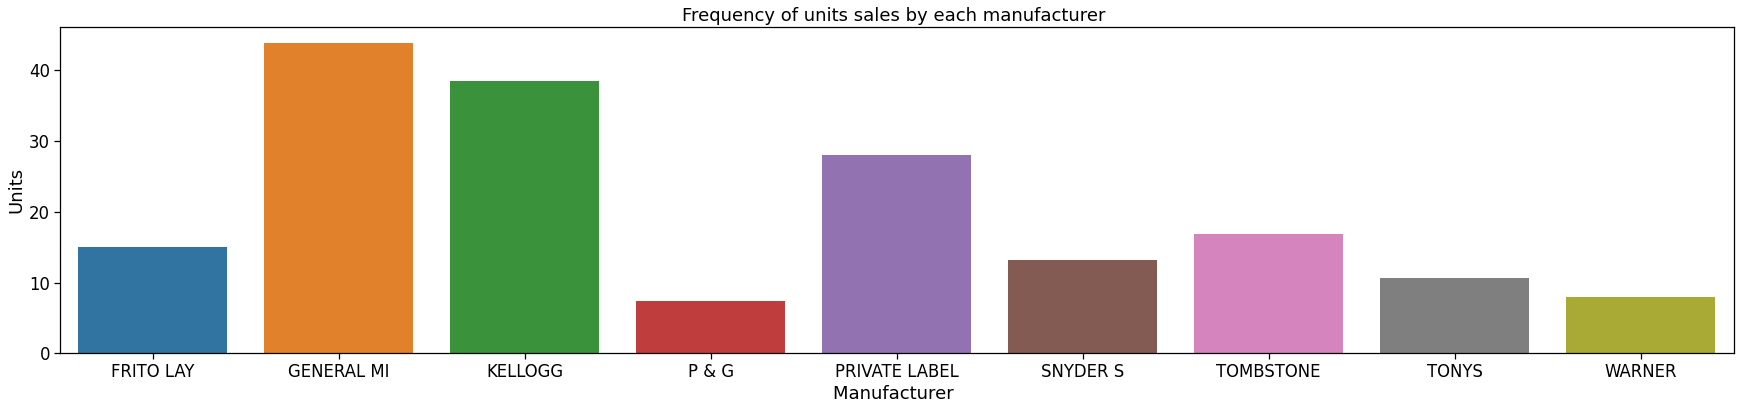

In [ ]:
plt.figure(figsize=(30, 6))
group_2=merged_data.groupby('manufacturer').units.mean()
sns.barplot(group_2.index, group_2.values)
plt.ylabel('Units')
plt.xlabel('Manufacturer ')
plt.title('Frequency of units sales by each manufacturer ')

Text(0.5, 1.0, 'Frequency of units sales by each product size')

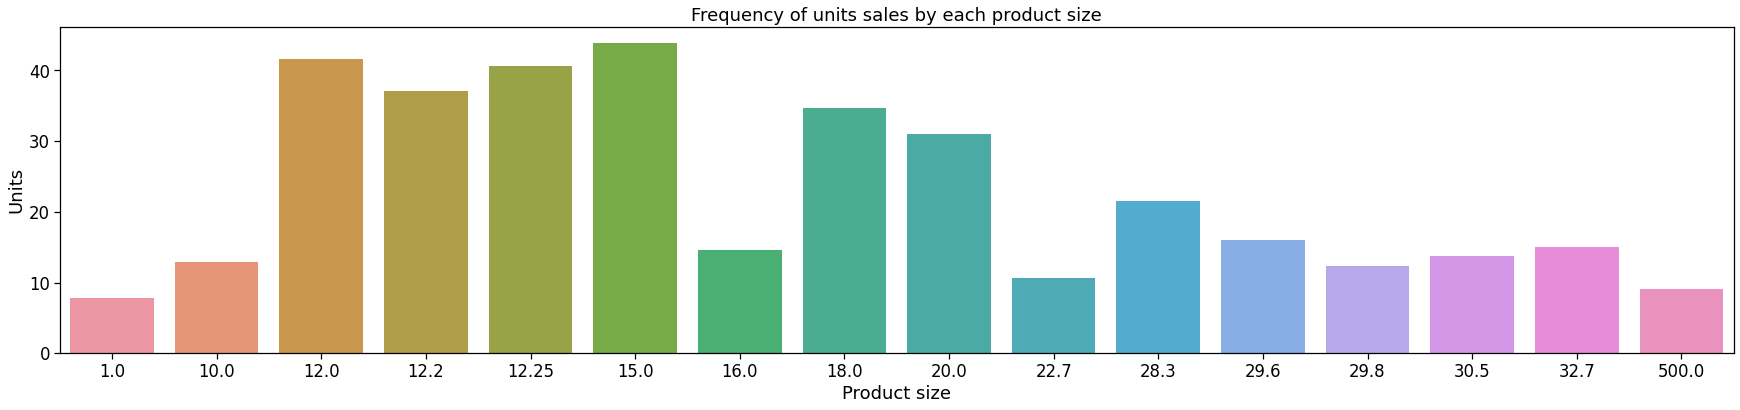

In [ ]:
plt.figure(figsize=(30, 6))
group_2=merged_data.groupby('product_size').units.mean()
sns.barplot(group_2.index, group_2.values)
plt.ylabel('Units')
plt.xlabel('Product size')
plt.title('Frequency of units sales by each product size')

Text(0.5, 1.0, 'Frequency of units sales by each address_state_prov_code ')

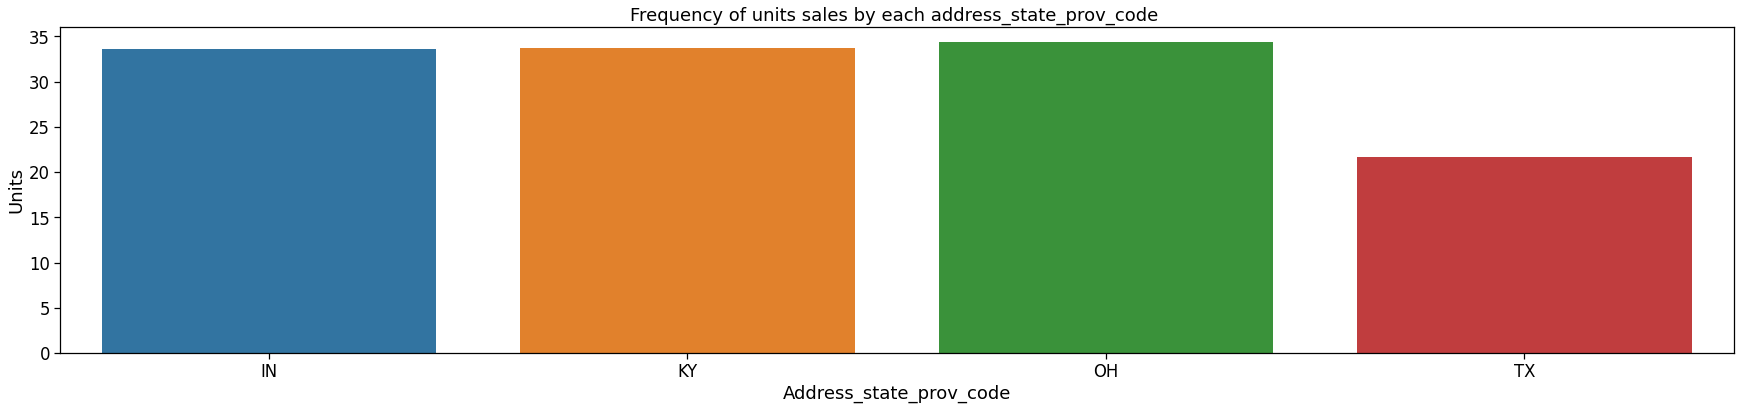

In [ ]:
plt.figure(figsize=(30, 6))
group_2=merged_data.groupby('address_state_prov_code').units.mean()
sns.barplot(group_2.index, group_2.values)
plt.ylabel('Units')
plt.xlabel('Address_state_prov_code')
plt.title('Frequency of units sales by each address_state_prov_code ')

Text(0.5, 1.0, 'Frequency of units sales by each msa code')

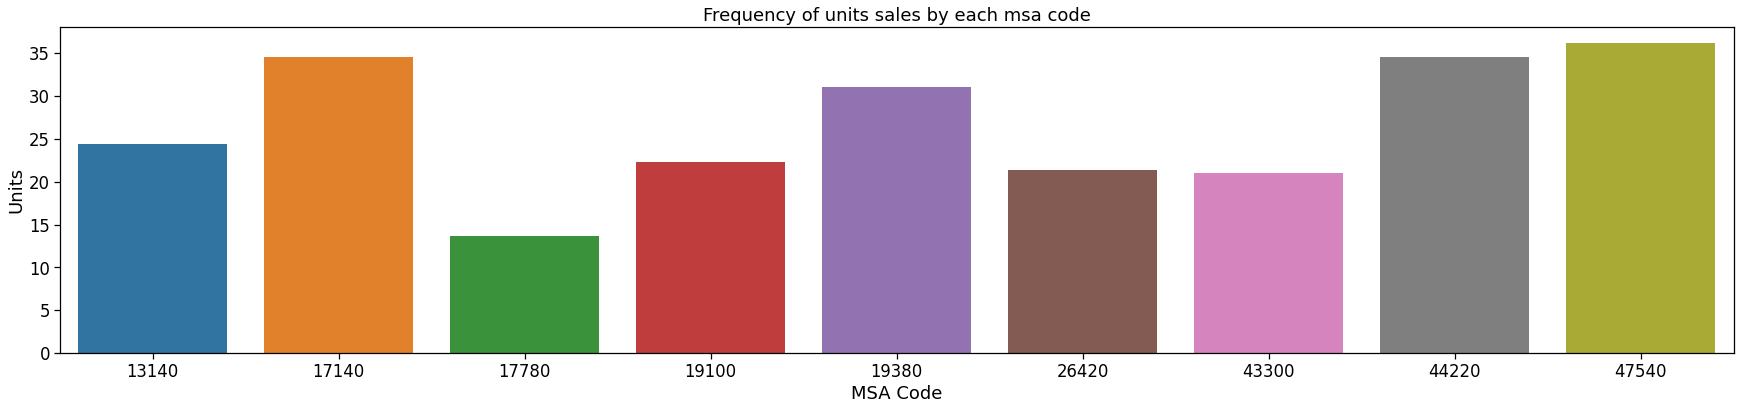

In [ ]:
plt.figure(figsize=(30, 6))
group_2=merged_data.groupby('msa_code').units.mean()
sns.barplot(group_2.index, group_2.values)
plt.ylabel('Units')
plt.xlabel('MSA Code')
plt.title('Frequency of units sales by each msa code')

Text(0.5, 1.0, 'Frequency of units sales by each store segment value')

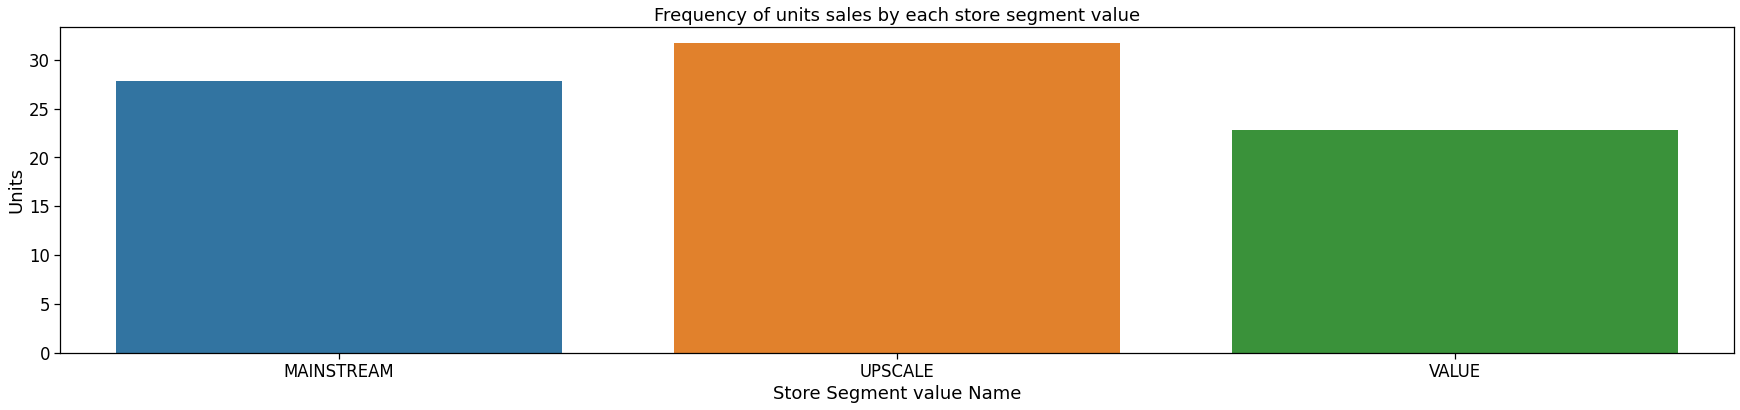

In [ ]:
plt.figure(figsize=(30, 6))
group_2=merged_data.groupby('seg_value_name').units.mean()
sns.barplot(group_2.index, group_2.values)
plt.ylabel('Units')
plt.xlabel('Store Segment value Name')
plt.title('Frequency of units sales by each store segment value')

#### Multiple groupby

In [ ]:
category_month = merged_data.groupby(["category", "month"], as_index=False).mean()
category_month.head()

category  month     store_num  ...  day_of_year       week  quarter
0  BAG SNACKS      1  14767.966494  ...    17.358669   2.908253      1.0
1  BAG SNACKS      2  14766.673814  ...    44.488660   6.831546      1.0
2  BAG SNACKS      3  14757.743889  ...    74.943500  11.145236      1.0
3  BAG SNACKS      4  14764.607612  ...   106.234824  15.693435      2.0
4  BAG SNACKS      5  14766.133141  ...   135.498557  19.833265      2.0

[5 rows x 16 columns]

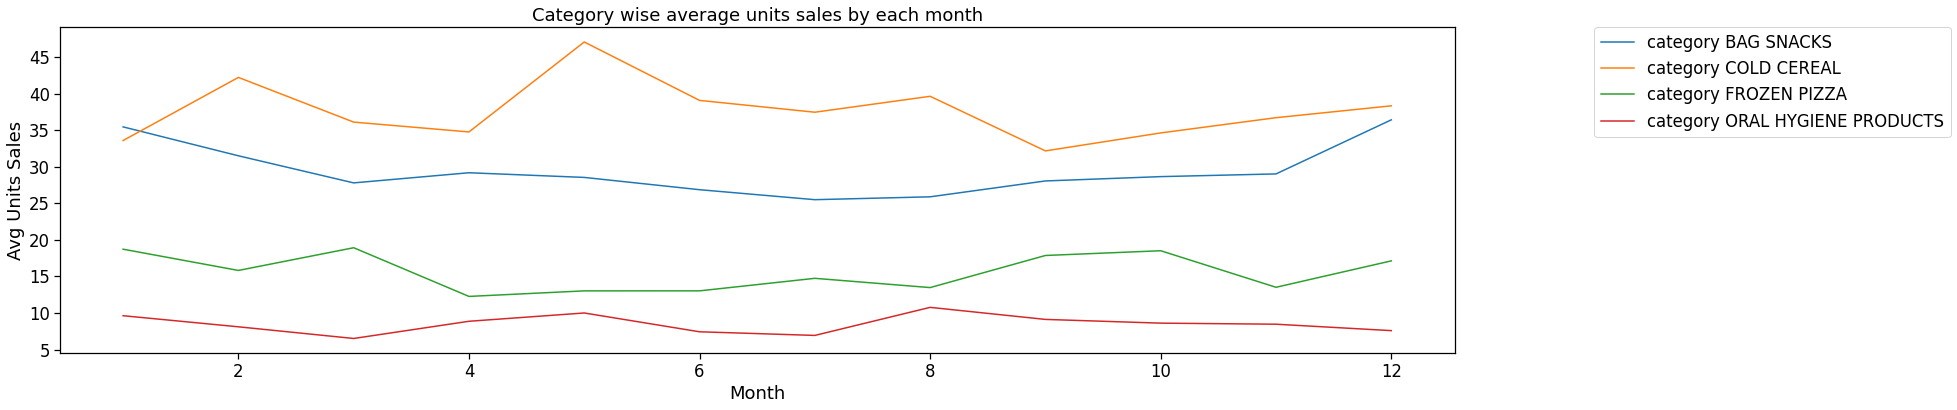

In [ ]:
plt.figure(figsize=(25, 6))
for store in merged_data.category.unique()[:5]:
    df_tmp = category_month[category_month.category == store]
    plt.plot(df_tmp.month, df_tmp.units, label=f"category {store}")
plt.xlabel("Month")
plt.ylabel("Avg Units Sales")
plt.title('Category wise average units sales by each month')
plt.legend(bbox_to_anchor=(1.1, 1),borderaxespad=0);

In [ ]:
sub_category_month = merged_data.groupby(["sub_category", "month"], as_index=False).mean()
sub_category_month.head()

sub_category  month     store_num  ...  day_of_year       week  quarter
0  ADULT CEREAL      1  14786.734132  ...    17.360479   2.908982      1.0
1  ADULT CEREAL      2  14778.657895  ...    44.500000   6.833333      1.0
2  ADULT CEREAL      3  14778.657895  ...    74.928571  11.142857      1.0
3  ADULT CEREAL      4  14778.657895  ...   106.230769  15.692308      2.0
4  ADULT CEREAL      5  14778.657895  ...   135.500000  19.833333      2.0

[5 rows x 16 columns]

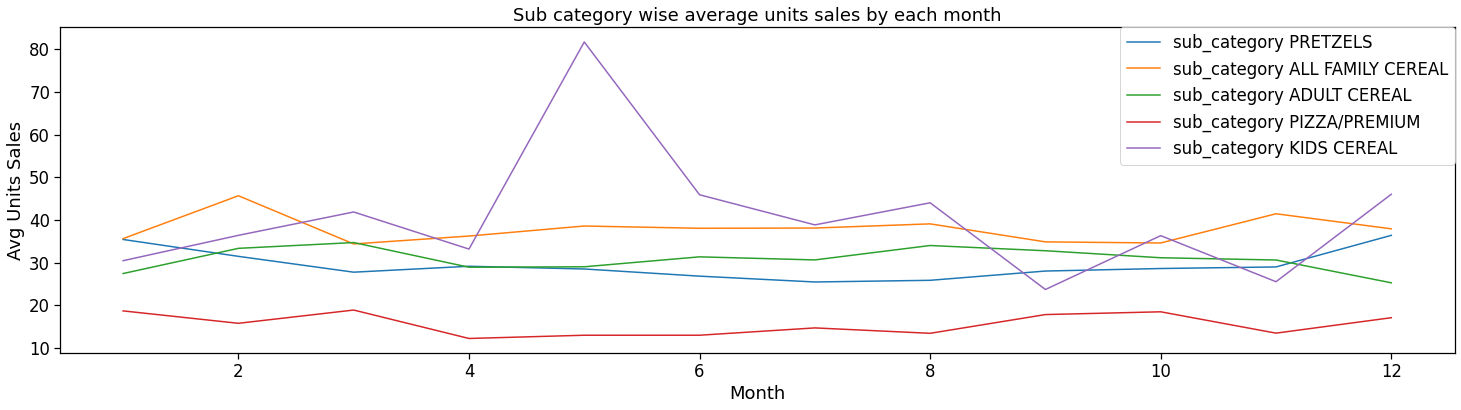

In [ ]:
plt.figure(figsize=(25, 6))
for store in merged_data.sub_category.unique()[:5]:
    df_tmp = sub_category_month[sub_category_month.sub_category == store]
    plt.plot(df_tmp.month, df_tmp.units, label=f"sub_category {store}")
plt.xlabel("Month")
plt.ylabel("Avg Units Sales")
plt.title('Sub category wise average units sales by each month')
plt.legend(bbox_to_anchor=(1, 1),borderaxespad=0);

In [ ]:
manufacturer_month = merged_data.groupby(["manufacturer", "month"], as_index=False).mean()
manufacturer_month.head()

manufacturer  month     store_num  ...  day_of_year       week  quarter
0    FRITO LAY      1  14611.326139  ...    17.355715   2.907274      1.0
1    FRITO LAY      2  14596.970739  ...    44.493050   6.832480      1.0
2    FRITO LAY      3  14580.777078  ...    74.952141  11.146725      1.0
3    FRITO LAY      4  14596.517568  ...   106.229054  15.692568      2.0
4    FRITO LAY      5  14601.552786  ...   135.499267  19.833578      2.0

[5 rows x 16 columns]

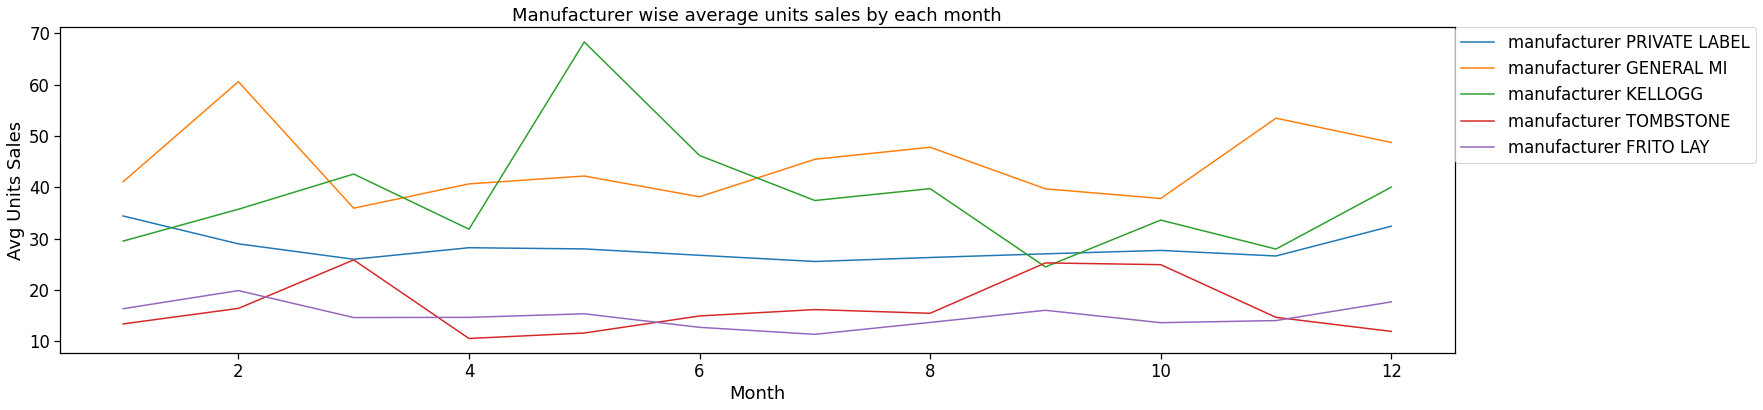

In [ ]:
plt.figure(figsize=(25, 6))
for store in merged_data.manufacturer.unique()[:5]:
    df_tmp = manufacturer_month[manufacturer_month.manufacturer == store]
    plt.plot(df_tmp.month, df_tmp.units, label=f"manufacturer {store}")
plt.xlabel("Month")
plt.ylabel("Avg Units Sales")
plt.title('Manufacturer wise average units sales by each month')
plt.legend(bbox_to_anchor=(1, 1),borderaxespad=0);

In [ ]:
seg_month = merged_data.groupby(["seg_value_name", "month"], as_index=False).mean()
seg_month.head()

seg_value_name  month     store_num  ...  day_of_year       week  quarter
0     MAINSTREAM      1  14722.734337  ...    17.353904   2.907714      1.0
1     MAINSTREAM      2  14720.440903  ...    44.479201   6.827356      1.0
2     MAINSTREAM      3  14718.418265  ...    74.931338  11.143249      1.0
3     MAINSTREAM      4  14724.593372  ...   106.218850  15.690886      2.0
4     MAINSTREAM      5  14713.798964  ...   135.493782  19.832211      2.0

[5 rows x 16 columns]

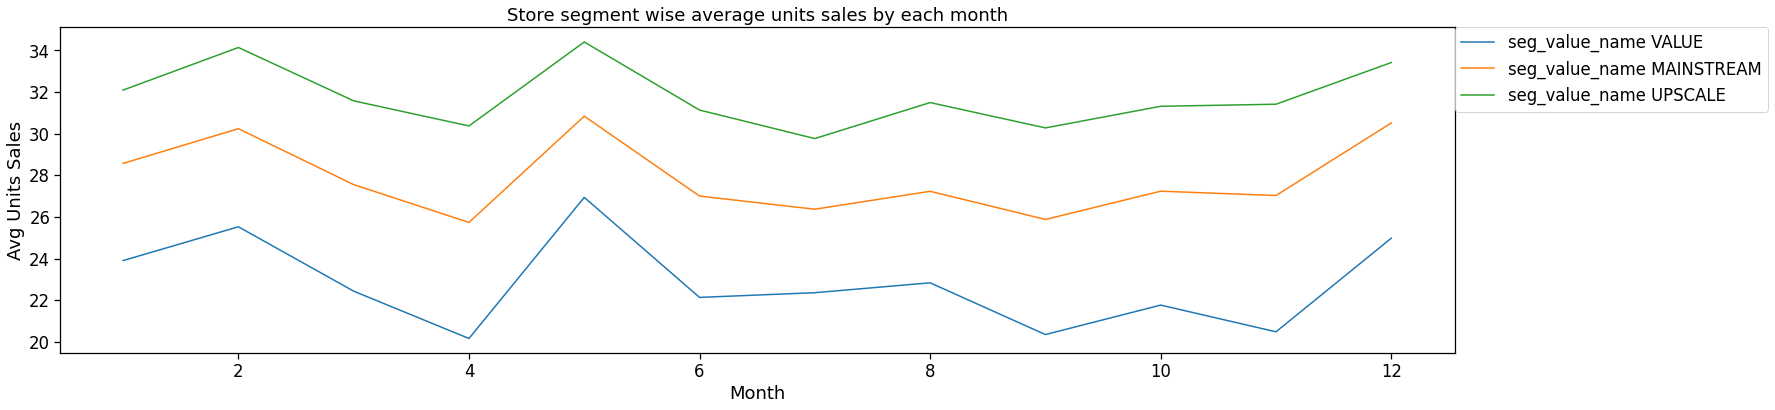

In [ ]:
plt.figure(figsize=(25, 6))
for store in merged_data.seg_value_name.unique()[:5]:
    df_tmp = seg_month[seg_month.seg_value_name == store]
    plt.plot(df_tmp.month, df_tmp.units, label=f"seg_value_name {store}")
plt.xlabel("Month")
plt.ylabel("Avg Units Sales")
plt.title('Store segment wise average units sales by each month')
plt.legend(bbox_to_anchor=(1, 1),borderaxespad=0);

In [ ]:
msa_month = merged_data.groupby(["msa_code", "month"], as_index=False).mean()
msa_month.head()

msa_code  month  store_num  ...  day_of_year       week  quarter
0    13140      1    13827.0  ...    17.357143   2.908730      1.0
1    13140      2    13827.0  ...    44.500000   6.833333      1.0
2    13140      3    13827.0  ...    74.900312  11.137072      1.0
3    13140      4    13827.0  ...   106.214765  15.691275      2.0
4    13140      5    13827.0  ...   135.487273  19.832727      2.0

[5 rows x 16 columns]

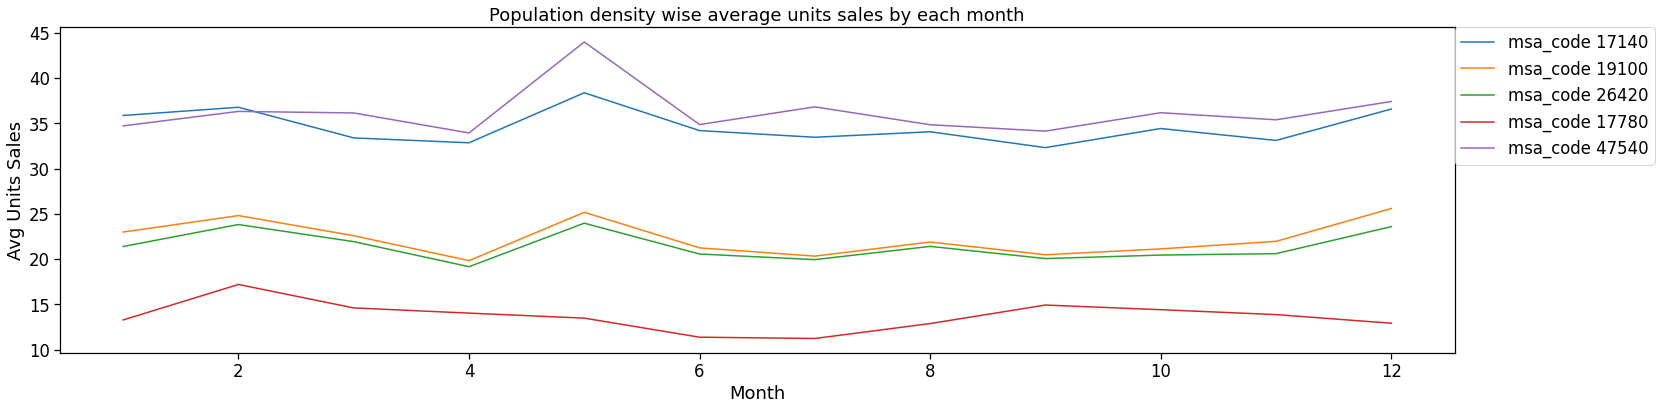

In [ ]:
plt.figure(figsize=(25, 6))
for store in merged_data.msa_code.unique()[:5]:
    df_tmp = msa_month[msa_month.msa_code == store]
    plt.plot(df_tmp.month, df_tmp.units, label=f"msa_code {store}")
plt.xlabel("Month")
plt.ylabel("Avg Units Sales")
plt.title('Population density wise average units sales by each month')
plt.legend(bbox_to_anchor=(1, 1),borderaxespad=0);

In [ ]:
product_size_month = merged_data.groupby(["product_size", "month"], as_index=False).mean()
product_size_month.head()

product_size  month     store_num  ...  day_of_year       week  quarter
0           1.0      1  14406.257699  ...    17.379254   2.909238      1.0
1           1.0      2  14530.677991  ...    44.565731   6.841950      1.0
2           1.0      3  14389.852375  ...    74.983312  11.147625      1.0
3           1.0      4  14489.680441  ...   106.139118  15.681818      2.0
4           1.0      5  14443.839580  ...   135.499250  19.824588      2.0

[5 rows x 15 columns]

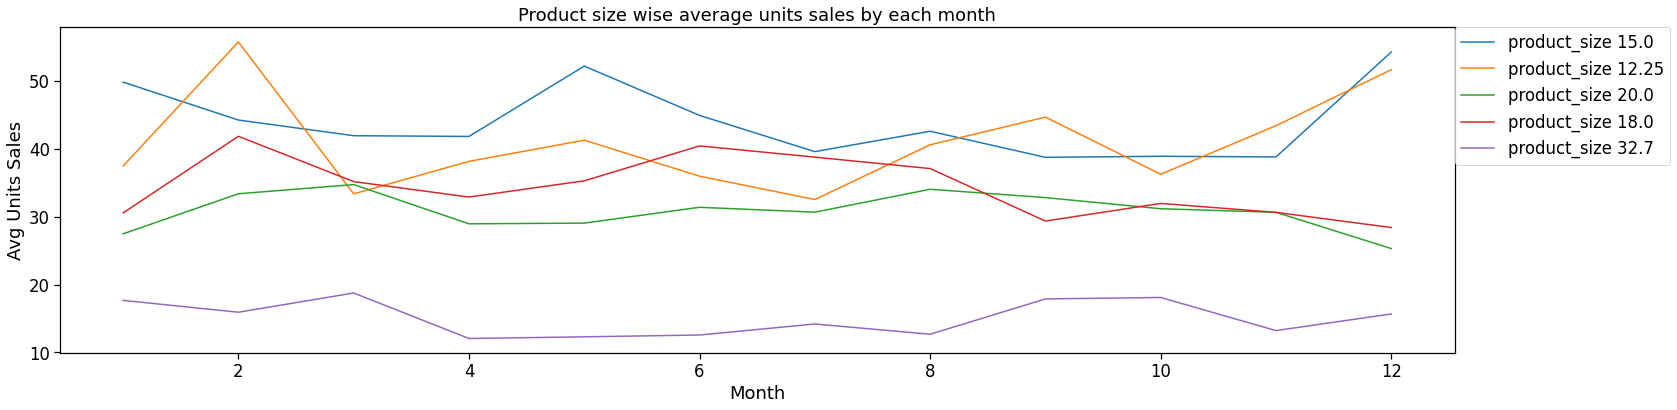

In [ ]:
plt.figure(figsize=(25, 6))
for store in merged_data.product_size.unique()[:5]:
    df_tmp = product_size_month[product_size_month.product_size == store]
    plt.plot(df_tmp.month, df_tmp.units, label=f"product_size {store}")
plt.xlabel("Month")
plt.ylabel("Avg Units Sales")
plt.title('Product size wise average units sales by each month')
plt.legend(bbox_to_anchor=(1, 1),borderaxespad=0);

#### Multigrouping with average base price

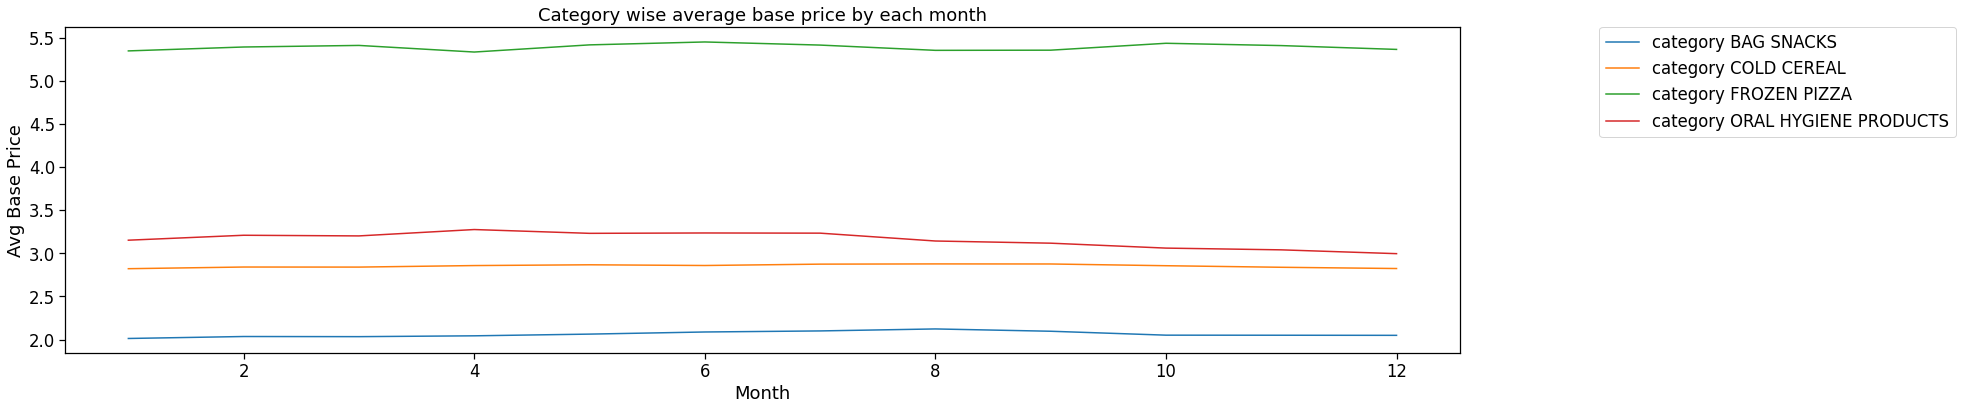

In [ ]:
plt.figure(figsize=(25, 6))
for store in merged_data.category.unique()[:5]:
    df_tmp = category_month[category_month.category == store]
    plt.plot(df_tmp.month, df_tmp.base_price, label=f"category {store}")
plt.xlabel("Month")
plt.ylabel("Avg Base Price")
plt.title('Category wise average base price by each month')
plt.legend(bbox_to_anchor=(1.1, 1),borderaxespad=0);

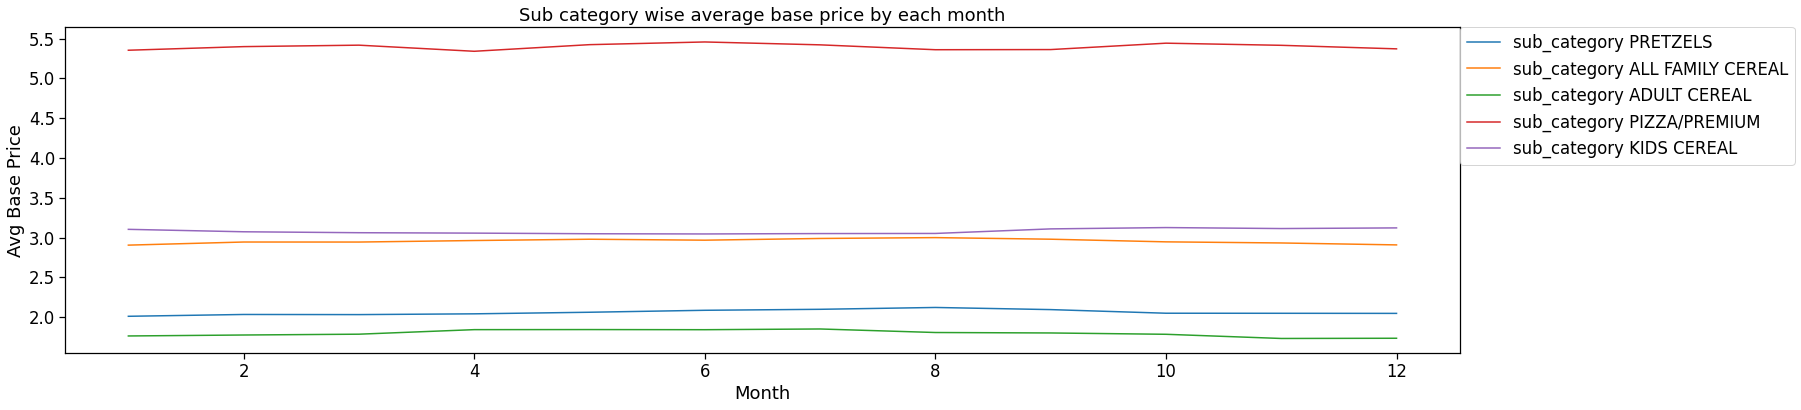

In [ ]:
plt.figure(figsize=(25, 6))
for store in merged_data.sub_category.unique()[:5]:
    df_tmp = sub_category_month[sub_category_month.sub_category == store]
    plt.plot(df_tmp.month, df_tmp.base_price, label=f"sub_category {store}")
plt.xlabel("Month")
plt.ylabel("Avg Base Price")
plt.title('Sub category wise average base price by each month')
plt.legend(bbox_to_anchor=(1, 1),borderaxespad=0);

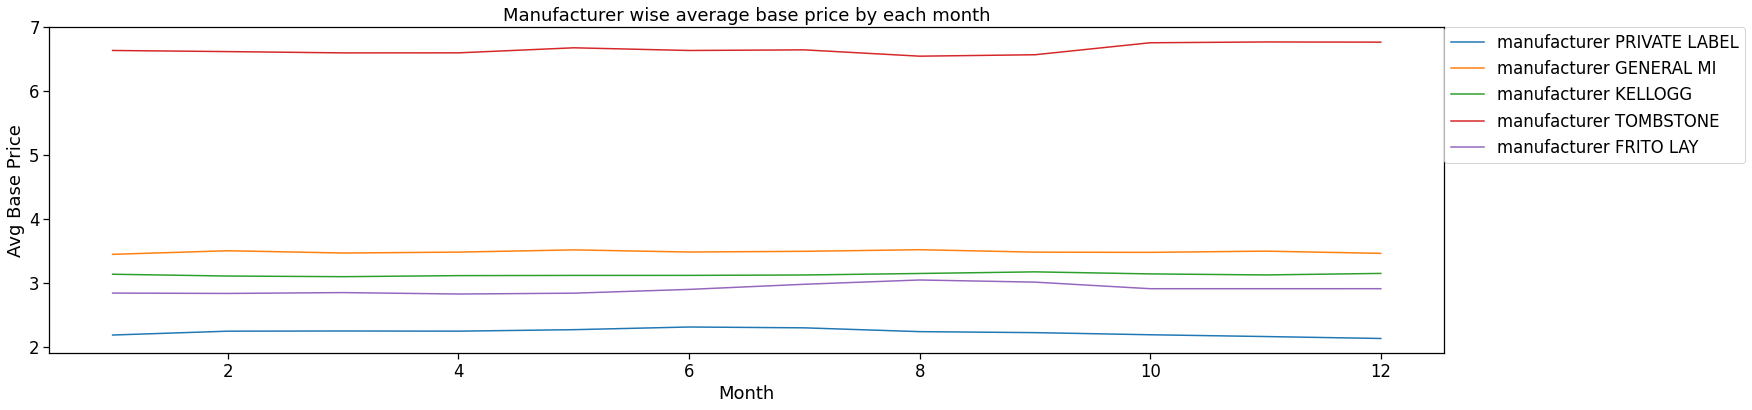

In [ ]:
plt.figure(figsize=(25, 6))
for store in merged_data.manufacturer.unique()[:5]:
    df_tmp = manufacturer_month[manufacturer_month.manufacturer == store]
    plt.plot(df_tmp.month, df_tmp.base_price, label=f"manufacturer {store}")
plt.xlabel("Month")
plt.ylabel("Avg Base Price")
plt.title('Manufacturer wise average base price by each month')
plt.legend(bbox_to_anchor=(1, 1),borderaxespad=0);

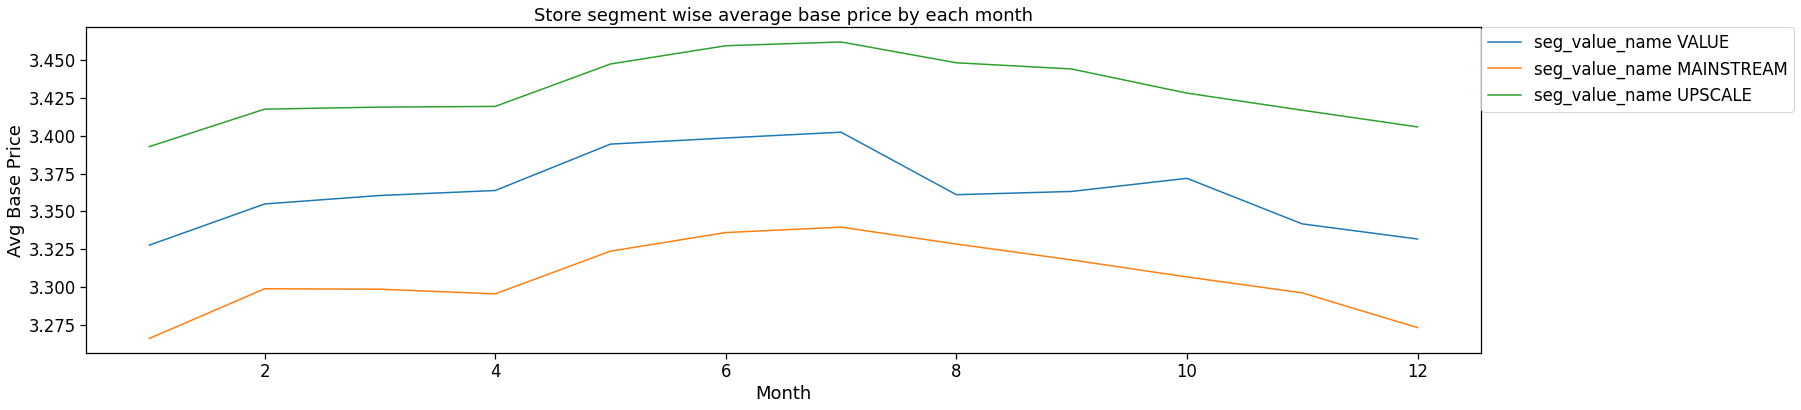

In [ ]:
plt.figure(figsize=(25, 6))
for store in merged_data.seg_value_name.unique()[:5]:
    df_tmp = seg_month[seg_month.seg_value_name == store]
    plt.plot(df_tmp.month, df_tmp.base_price, label=f"seg_value_name {store}")
plt.xlabel("Month")
plt.ylabel("Avg Base Price")
plt.title('Store segment wise average base price by each month')
plt.legend(bbox_to_anchor=(1, 1),borderaxespad=0);

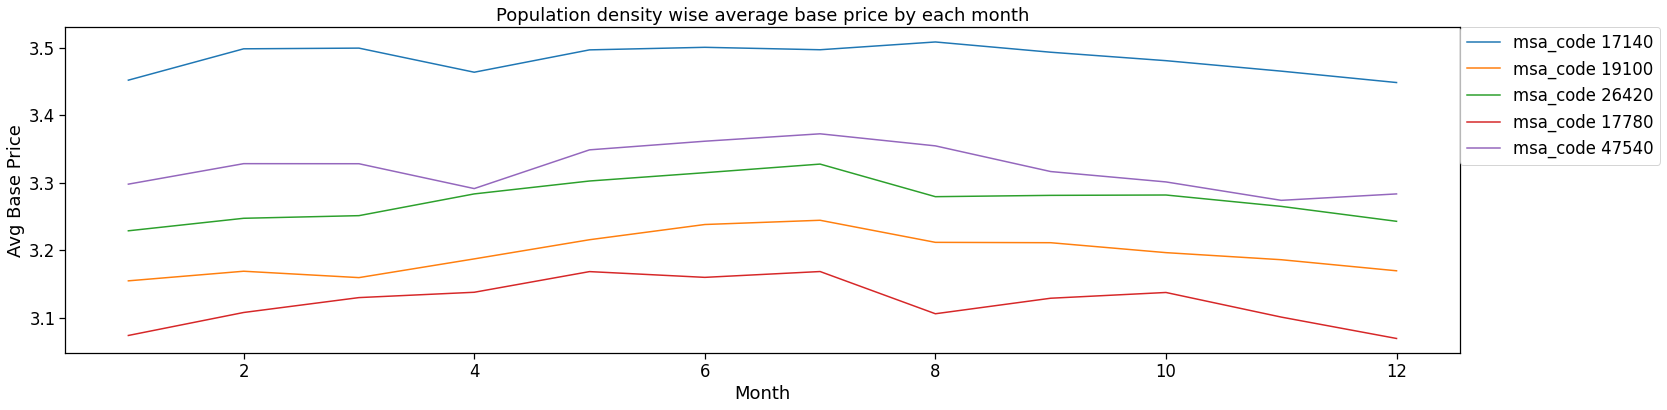

In [ ]:
plt.figure(figsize=(25, 6))
for store in merged_data.msa_code.unique()[:5]:
    df_tmp = msa_month[msa_month.msa_code == store]
    plt.plot(df_tmp.month, df_tmp.base_price, label=f"msa_code {store}")
plt.xlabel("Month")
plt.ylabel("Avg Base Price")
plt.title('Population density wise average base price by each month')
plt.legend(bbox_to_anchor=(1, 1),borderaxespad=0);

#### Check correlation between numerical dependent varibales 

In [ ]:
merged_data.dtypes

week_end_date              datetime64[ns]
store_num                           int64
upc                                 int64
base_price                        float64
feature                          category
display                          category
units                               int64
description                        object
manufacturer                       object
category                           object
sub_category                       object
product_size                      float64
store_id                            int64
store_name                         object
address_city_name                  object
address_state_prov_code            object
msa_code                         category
seg_value_name                     object
parking_space_qty                 float64
sales_area_size_num                 int64
avg_weekly_baskets                  int64
year                                int64
month                               int64
day                               

In [ ]:
numerical_corr = merged_data[['base_price','avg_weekly_baskets','sales_area_size_num','parking_space_qty','units']]

In [ ]:
numerical_corr.head()

base_price  avg_weekly_baskets  ...  parking_space_qty  units
0        1.57               12707  ...              196.0     13
1        1.39               12707  ...              196.0     20
2        1.88               12707  ...              196.0     14
3        1.88               12707  ...              196.0     29
4        1.98               12707  ...              196.0     35

[5 rows x 5 columns]

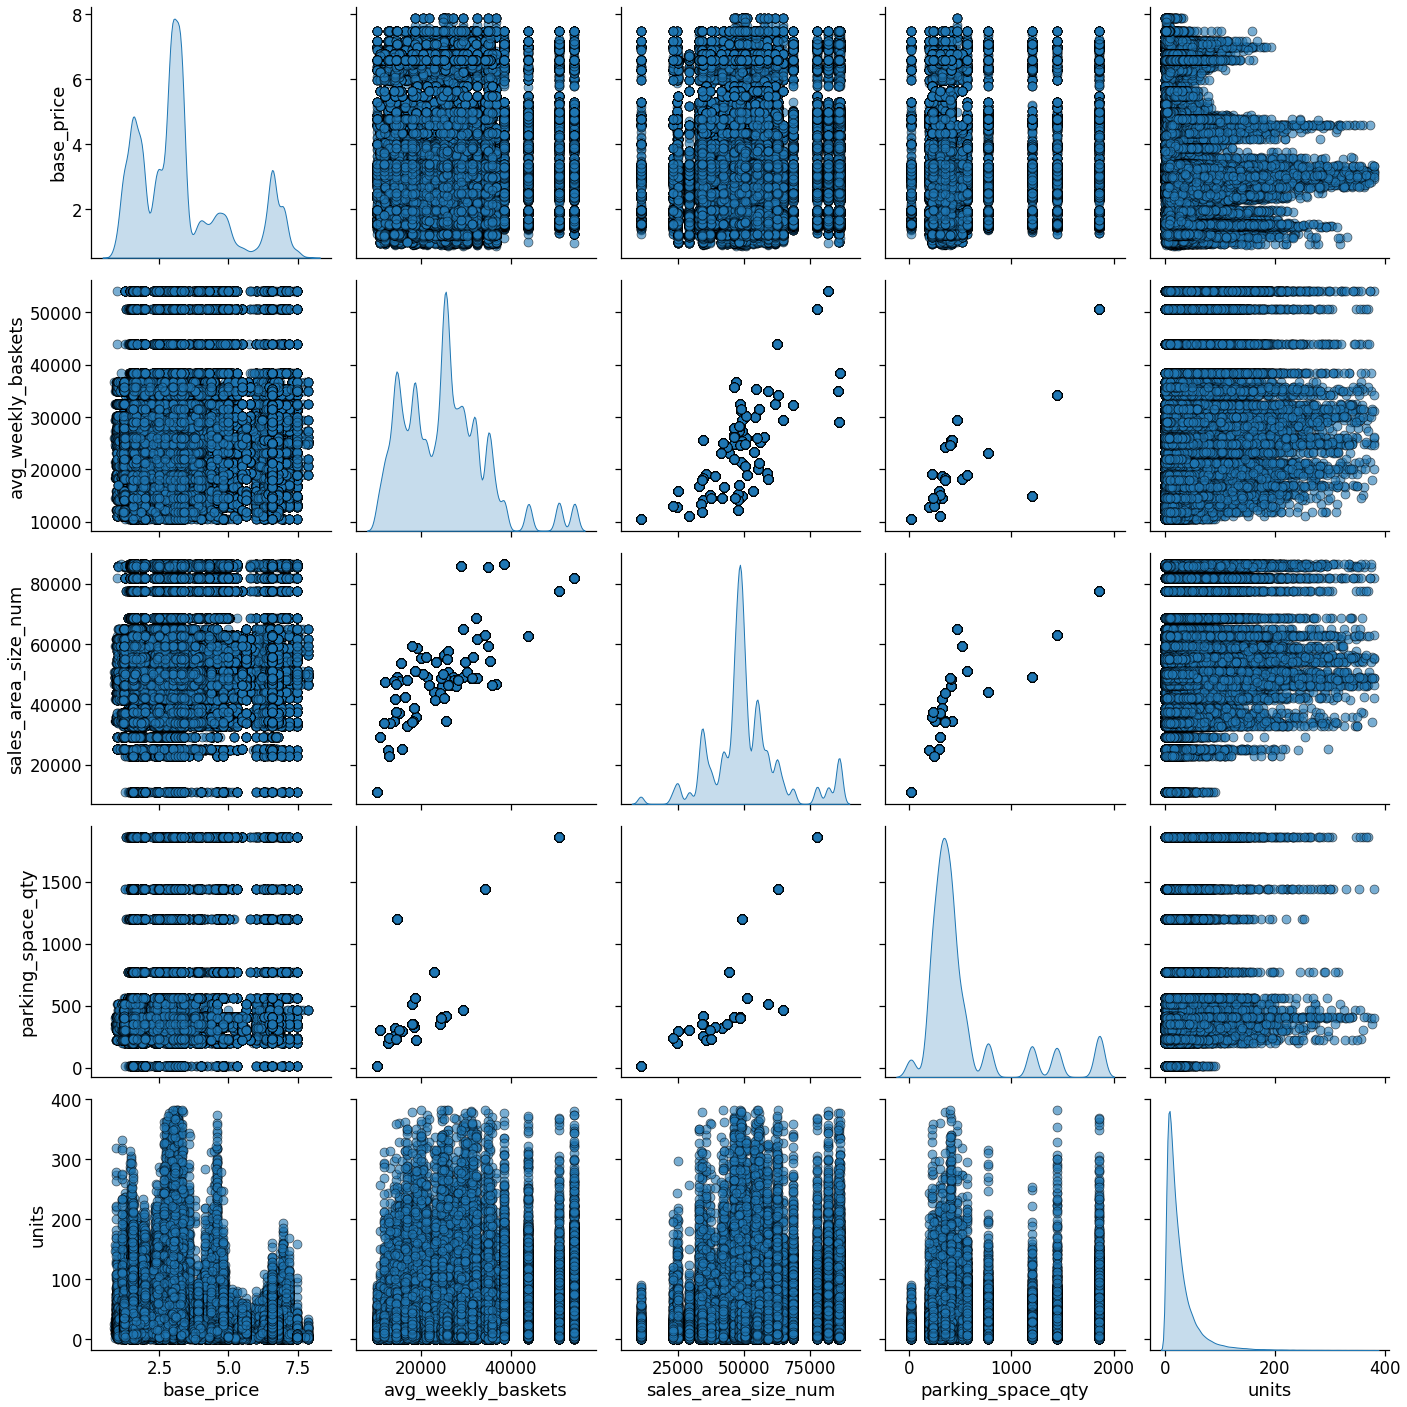

<Figure size 2160x432 with 0 Axes>

In [ ]:
#sns.pairplot(numerical_corr, diag_kind="hist")
sns.pairplot(numerical_corr, diag_kind = 'kde',plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},size = 4)
plt.figure(figsize=(30, 6))
plt.suptitle('Correlation amongst numerical varibales', size = 28);

In [ ]:
merged_data = merged_data.drop(['parking_space_qty', 'description'], axis=1)

In [ ]:
merged_data.head()

week_end_date  store_num         upc  ...  day_of_year week quarter
0    2009-01-14        367  1111009477  ...           14    3       1
1    2009-01-14        367  1111009497  ...           14    3       1
2    2009-01-14        367  1111085319  ...           14    3       1
3    2009-01-14        367  1111085345  ...           14    3       1
4    2009-01-14        367  1111085350  ...           14    3       1

[5 rows x 25 columns]

In [ ]:
merged_data.to_csv('retail_data.csv')
!cp retail_data.csv "/content/gdrive/MyDrive/Retail_demand_forecasting/"